In [1]:
#import pandas as pd
#
# # 读取CSV文件
# df = pd.read_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/combine_nuts1_period.csv')

# # 使用str.contains()来筛选包含关键字"DE1"的行
# filtered_df = df[df.apply(lambda row: row.astype(str).str.contains('DE3').any(), axis=1)]
# #print(filtered_df, filtered_df.shape)

# # 如果需要，你还可以保存这些行到一个新的CSV文件中
# filtered_df.to_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/combine_nuts1_period_Berlin.csv', index= True)

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/combine_nuts1_period_Berlin.csv')
#print(df, df.shape)

df_new = df.rename(columns={'Unnamed: 0': 'true index'})
print(df_new)

     true index        date NUTS1  infection_daily   humidity  temperature  \
0             2  2020-03-01   DE3               15  73.874469     6.343339   
1            18  2020-03-02   DE3               22  79.994540     5.413423   
2            34  2020-03-03   DE3               22  85.332524     3.873678   
3            50  2020-03-04   DE3               31  82.305681     3.224481   
4            66  2020-03-05   DE3               25  78.843680     4.483410   
..          ...         ...   ...              ...        ...          ...   
666       10658  2021-12-27   DE3             2598  84.124463    -1.265532   
667       10674  2021-12-28   DE3             2513  88.880840     1.913893   
668       10690  2021-12-29   DE3             2492  95.104220     4.898682   
669       10706  2021-12-30   DE3             2517  93.614232     9.740884   
670       10722  2021-12-31   DE3             1747  85.999689    11.614371   

     traffic_volume  contactMean   contactIdx  policyIdx  
0   

In [2]:
print(df_new.columns)
#delete true index
# del df_new['true index', 'NUTS1']
#df_new= df_new['date'].values.astype(float)
#delete the real index
df_new = df_new.drop('true index', axis=1)
df_new = df_new.drop('NUTS1', axis=1)
df_new = df_new.drop('date', axis=1)

print(df_new)       #true df_new

Index(['true index', 'date', 'NUTS1', 'infection_daily', 'humidity',
       'temperature', 'traffic_volume', 'contactMean', 'contactIdx',
       'policyIdx'],
      dtype='object')
     infection_daily   humidity  temperature  traffic_volume  contactMean  \
0                 15  73.874469     6.343339        17125669    44.854530   
1                 22  79.994540     5.413423        22885340    25.474820   
2                 22  85.332524     3.873678        22290526    26.287739   
3                 31  82.305681     3.224481        22672628    25.824640   
4                 25  78.843680     4.483410        23222186    26.132317   
..               ...        ...          ...             ...          ...   
666             2598  84.124463    -1.265532        32624931    18.788017   
667             2513  88.880840     1.913893        33776319    17.483408   
668             2492  95.104220     4.898682        34523998    17.644848   
669             2517  93.614232     9.740884     

In [3]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

import torch
 
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
 
%matplotlib inline
%config InlineBackend.figure_format='retina'
 
sns.set(style='whitegrid', palette='muted', font_scale=1.2) 
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"] 
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE)) 
rcParams['figure.figsize'] = 14, 6
register_matplotlib_converters()
 
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [4]:
sequence_length = 14    # use 14 previous days to predict the next one
input_dim = 7           # we have 7 columns

print(df_new.shape, len(df_new))


df_numpy= df_new.values     #change DataFrame to Numpy 
#scaler= StandardScaler()
scaler= MinMaxScaler()      #set values up between 0 and 1
df_numpy= scaler.fit_transform(df_numpy)

X, Y = [], []
for i in range(len(df_numpy) - sequence_length):
    X.append(df_numpy[i:i+sequence_length])
    Y.append(df_numpy[i+sequence_length, 0])  # Predicting column"A"

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

print('X, Y:', X.shape, Y.shape)

(671, 7) 671
X, Y: torch.Size([657, 14, 7]) torch.Size([657])


/tmp/ipykernel_1114164/2376158461.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  X = torch.tensor(X, dtype=torch.float32)


In [5]:
train_size = int(0.7 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size
print(train_size, val_size, test_size)

# X_train, Y_train = X[:train_size], Y[:train_size]
# X_val, Y_val = X[train_size:train_size+val_size], Y[train_size:train_size+val_size]

# X_test, Y_test = X[train_size+val_size:], Y[train_size+val_size:]

# print('train and test length:', X_train.shape, X_val.shape, X_test.shape)

459 131 67


In [6]:
################ randomselect#################
import random
nums = random.sample(range(0, 459+ 131), 459+ 131)
print(len(nums))

590


In [7]:
train_index= nums[:459]
val_index= nums[459: 590+1]
print(len(train_index), len(val_index))
print(train_index)
print(val_index)
print()

459 131
[485, 369, 257, 427, 24, 477, 484, 73, 391, 273, 361, 219, 338, 160, 46, 275, 181, 191, 582, 299, 96, 77, 481, 516, 198, 180, 149, 282, 506, 515, 43, 344, 244, 65, 25, 309, 87, 469, 57, 8, 47, 394, 106, 315, 475, 366, 322, 178, 269, 261, 358, 14, 543, 546, 465, 356, 514, 412, 240, 217, 379, 508, 400, 44, 79, 128, 329, 123, 246, 378, 129, 50, 455, 125, 383, 459, 251, 31, 510, 274, 53, 236, 55, 393, 100, 155, 410, 34, 126, 505, 91, 153, 154, 467, 101, 20, 89, 138, 548, 325, 511, 194, 466, 562, 431, 287, 254, 584, 278, 499, 242, 82, 232, 436, 172, 567, 397, 389, 185, 58, 403, 532, 205, 61, 319, 293, 374, 142, 214, 225, 337, 83, 480, 166, 312, 559, 250, 324, 539, 288, 45, 444, 531, 365, 556, 580, 586, 409, 41, 84, 7, 3, 518, 478, 86, 491, 163, 132, 579, 262, 253, 446, 318, 497, 135, 234, 509, 140, 227, 364, 377, 239, 295, 174, 375, 381, 355, 29, 113, 112, 523, 202, 28, 224, 575, 18, 395, 550, 248, 535, 461, 476, 362, 207, 450, 456, 69, 454, 294, 331, 405, 230, 33, 414, 568, 249, 44

In [8]:
#selected_elements = tensor[indices]
X_train, Y_train = X[train_index], Y[train_index]
X_val, Y_val = X[val_index], Y[val_index]

X_test, Y_test = X[train_size+val_size:], Y[train_size+val_size:]

print('train, valida, test of X:', X_train.shape, X_val.shape, X_test.shape)
print('train, valida, test of Y:', Y_train.shape, Y_val.shape, Y_test.shape)

train, valida, test of X: torch.Size([459, 14, 7]) torch.Size([131, 14, 7]) torch.Size([67, 14, 7])
train, valida, test of Y: torch.Size([459]) torch.Size([131]) torch.Size([67])


In [9]:
print(X_test.shape, Y_test.shape) 
print(X_test[0, :, :])
print()
print(X_test[1, :, :])
print()
print(Y_test[0])

torch.Size([67, 14, 7]) torch.Size([67])
tensor([[0.2168, 0.7840, 0.4764, 0.8531, 0.1686, 0.0125, 0.6752],
        [0.2325, 0.7515, 0.4536, 0.8460, 0.1628, 0.0080, 0.6752],
        [0.2104, 0.8831, 0.5307, 0.8527, 0.1547, 0.0097, 0.6752],
        [0.2404, 0.7725, 0.5263, 0.8280, 0.1699, 0.0175, 0.6752],
        [0.1621, 0.7684, 0.4736, 0.6112, 0.3479, 0.1830, 0.6752],
        [0.1636, 0.7257, 0.4916, 0.4965, 0.1389, 0.0160, 0.6752],
        [0.2564, 0.7015, 0.5293, 0.7394, 0.1312, 0.0148, 0.6752],
        [0.2714, 0.7567, 0.5887, 0.6599, 0.1647, 0.0226, 0.6752],
        [0.2832, 0.5963, 0.6853, 0.6700, 0.1395, 0.0123, 0.6752],
        [0.2446, 0.5908, 0.5771, 0.6680, 0.1777, 0.0145, 0.6752],
        [0.2796, 0.6671, 0.4464, 0.6721, 0.1843, 0.0148, 0.6752],
        [0.1754, 0.7090, 0.4357, 0.4887, 0.2747, 0.1777, 0.6752],
        [0.1682, 0.6579, 0.4259, 0.4053, 0.1094, 0.0100, 0.6752],
        [0.3196, 0.6966, 0.4361, 0.6745, 0.1431, 0.0088, 0.6752]])

tensor([[0.2325, 0.7515, 0.4536, 

In [10]:
# X_train, Y_train = X[:train_size], Y[:train_size]
# X_val, Y_val = X[train_size:train_size+val_size], Y[train_size:train_size+val_size]

# X_test, Y_test = X[train_size+val_size:], Y[train_size+val_size:]

# print('train and test length:', X_train.shape, X_val.shape, X_test.shape)

In [10]:
import torch.nn as nn

class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value (column "A")

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.batch_norm(out[:, -1, :])
        out = self.dropout(out)
        #out = self.dropout(out[:, -1, :])  # Take the last time step
        out = self.fc(out)
        return out

model = TimeSeriesLSTM(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print(model)

TimeSeriesLSTM(
  (lstm): LSTM(7, 50, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [73]:
################################# magic modify ########################

Epoch [10/200], Training Loss: 0.1219, Validation Loss: 0.0462
Epoch [20/200], Training Loss: 0.0730, Validation Loss: 0.0346
Epoch [30/200], Training Loss: 0.0520, Validation Loss: 0.0279
Epoch [40/200], Training Loss: 0.0281, Validation Loss: 0.0228
Epoch [50/200], Training Loss: 0.0156, Validation Loss: 0.0199
Epoch [60/200], Training Loss: 0.0102, Validation Loss: 0.0180
Epoch [70/200], Training Loss: 0.0087, Validation Loss: 0.0140
Epoch [80/200], Training Loss: 0.0063, Validation Loss: 0.0114
Epoch [90/200], Training Loss: 0.0052, Validation Loss: 0.0102
Epoch [100/200], Training Loss: 0.0050, Validation Loss: 0.0062
Epoch [110/200], Training Loss: 0.0045, Validation Loss: 0.0033
Epoch [120/200], Training Loss: 0.0041, Validation Loss: 0.0021
Epoch [130/200], Training Loss: 0.0038, Validation Loss: 0.0070
Epoch [140/200], Training Loss: 0.0040, Validation Loss: 0.0026
Epoch [150/200], Training Loss: 0.0035, Validation Loss: 0.0028
Epoch [160/200], Training Loss: 0.0033, Validatio

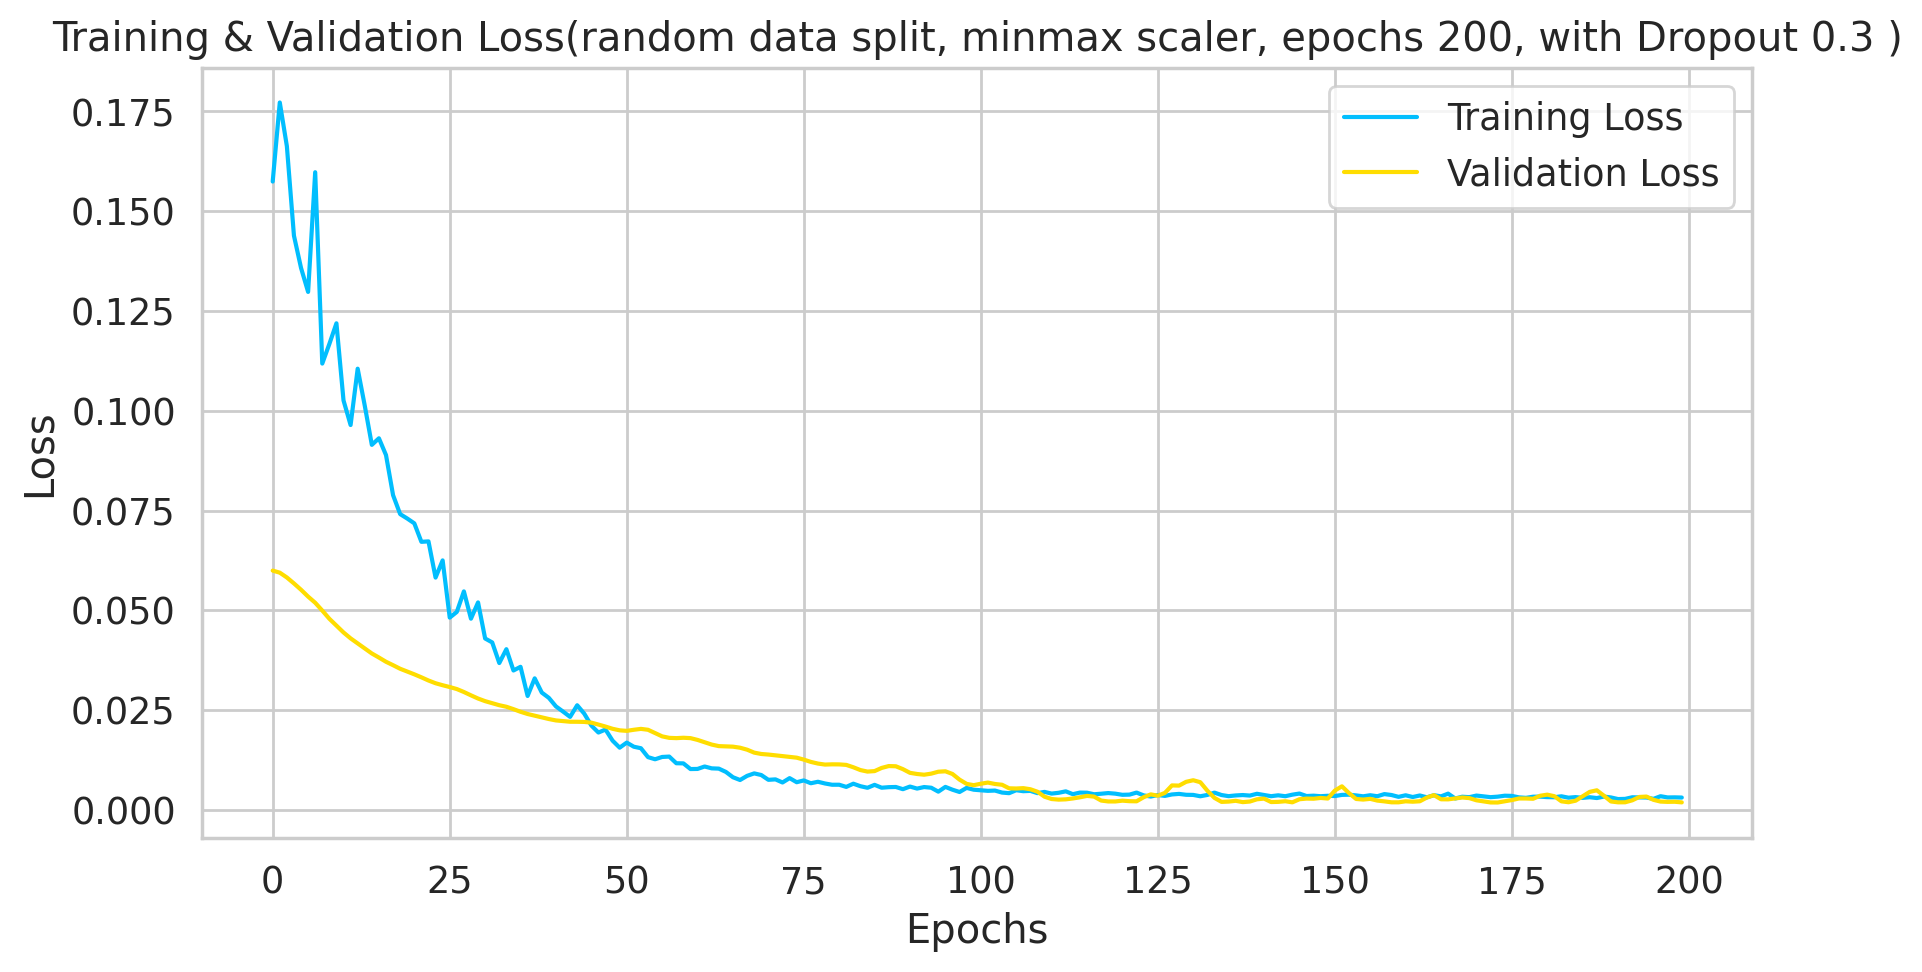

In [24]:
# ############################ random data split, minmax scaler, hidden_dim=50, epochs 200, with Dropout 0.3 #######################
# epochs = 200
# train_losses = []
# val_losses = []

# for epoch in range(epochs):
#     model.train()
#     outputs = model(X_train)
#     loss = criterion(outputs.squeeze(), Y_train)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     # Validate the model
#     model.eval()  # Set the model to evaluation mode
#     with torch.no_grad():
#         val_outputs = model(X_val)
#         val_loss = criterion(val_outputs.squeeze(), Y_val)
    
#     # Store the losses for plotting
#     train_losses.append(loss.item())
#     val_losses.append(val_loss.item())
    
#     if (epoch+1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# # Plotting the training and validation loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 200, with Dropout 0.3 )')
# plt.legend()
# plt.grid(True)
# plt.show()

Epoch [10/150], Training Loss: 0.1217, Validation Loss: 0.0362
Epoch [20/150], Training Loss: 0.0818, Validation Loss: 0.0264
Epoch [30/150], Training Loss: 0.0560, Validation Loss: 0.0192
Epoch [40/150], Training Loss: 0.0266, Validation Loss: 0.0148
Epoch [50/150], Training Loss: 0.0197, Validation Loss: 0.0132
Epoch [60/150], Training Loss: 0.0108, Validation Loss: 0.0109
Epoch [70/150], Training Loss: 0.0080, Validation Loss: 0.0093
Epoch [80/150], Training Loss: 0.0065, Validation Loss: 0.0071
Epoch [90/150], Training Loss: 0.0052, Validation Loss: 0.0058
Epoch [100/150], Training Loss: 0.0051, Validation Loss: 0.0041
Epoch [110/150], Training Loss: 0.0042, Validation Loss: 0.0027
Epoch [120/150], Training Loss: 0.0043, Validation Loss: 0.0018
Epoch [130/150], Training Loss: 0.0040, Validation Loss: 0.0093
Epoch [140/150], Training Loss: 0.0037, Validation Loss: 0.0020
Epoch [150/150], Training Loss: 0.0037, Validation Loss: 0.0117


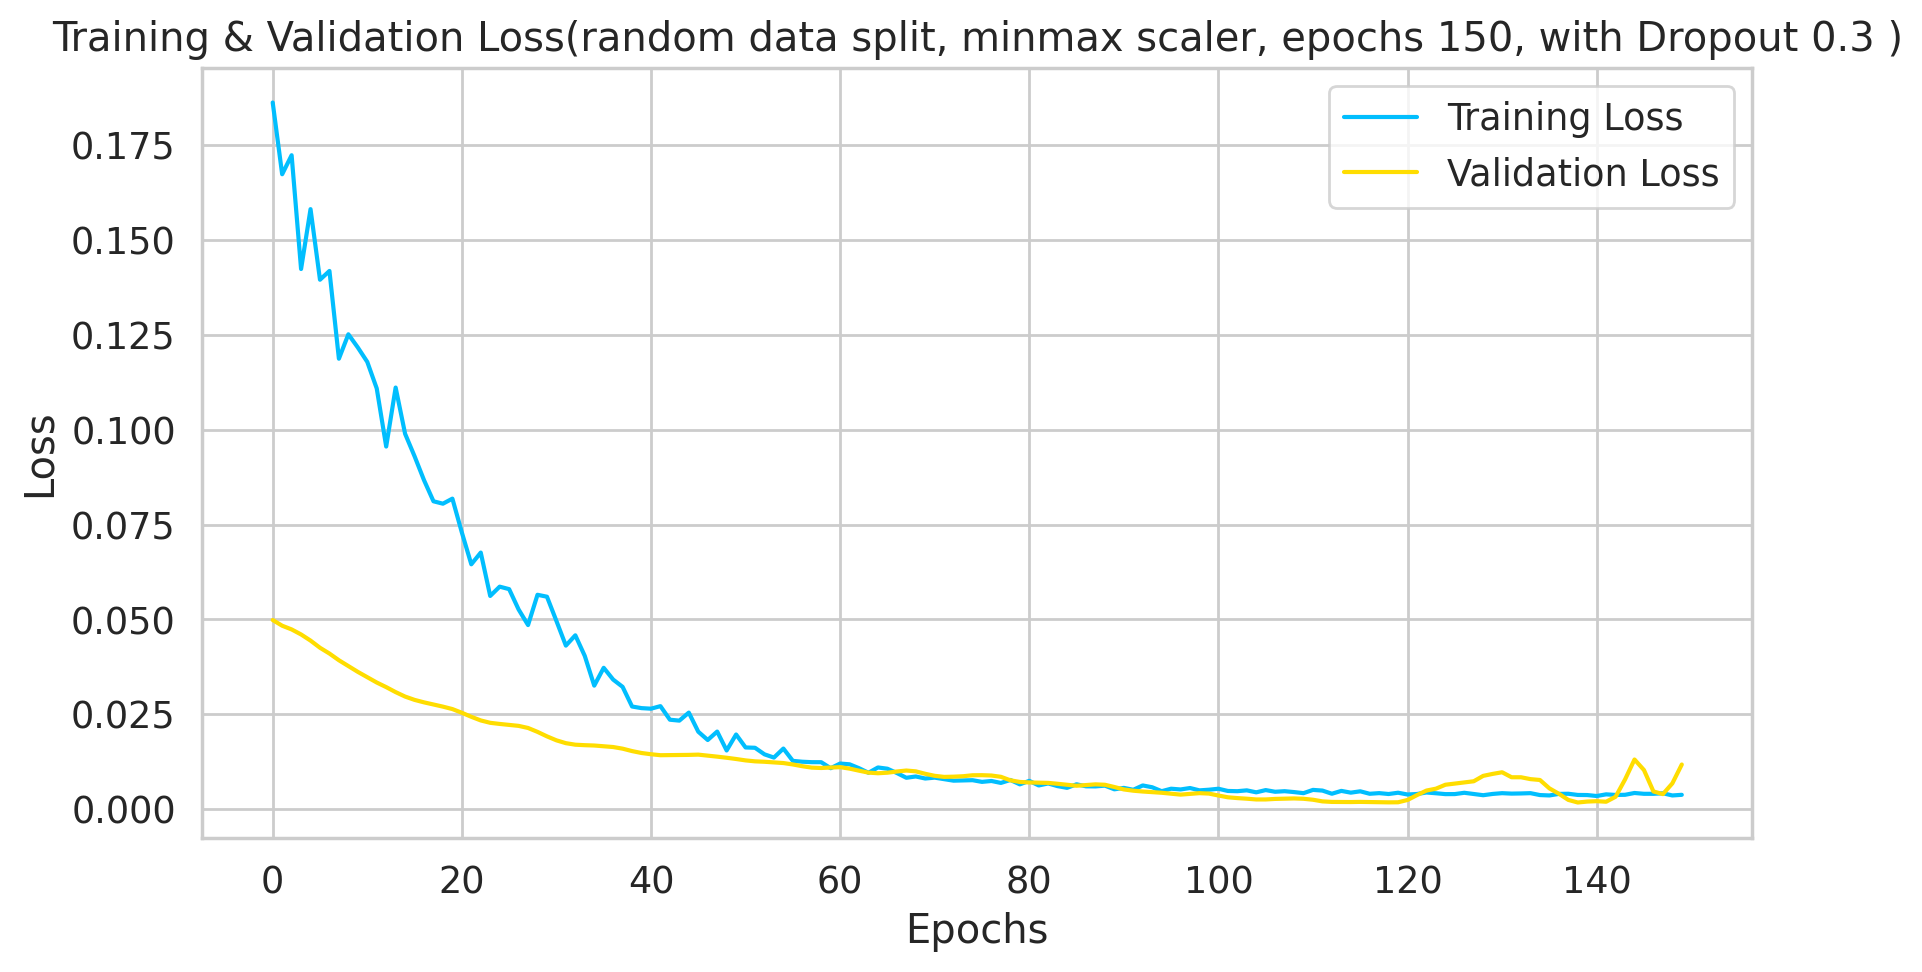

In [11]:
############################ random data split, minmax scaler, hidden_dim=50, epochs 200, with Dropout 0.3 #######################
epochs = 150
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 150, with Dropout 0.3 )')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/150], Training Loss: 0.1130, Validation Loss: 0.0458
Epoch [20/150], Training Loss: 0.0713, Validation Loss: 0.0352
Epoch [30/150], Training Loss: 0.0469, Validation Loss: 0.0275
Epoch [40/150], Training Loss: 0.0293, Validation Loss: 0.0234
Epoch [50/150], Training Loss: 0.0186, Validation Loss: 0.0208
Epoch [60/150], Training Loss: 0.0121, Validation Loss: 0.0182
Epoch [70/150], Training Loss: 0.0089, Validation Loss: 0.0154
Epoch [80/150], Training Loss: 0.0076, Validation Loss: 0.0134
Epoch [90/150], Training Loss: 0.0058, Validation Loss: 0.0108
Epoch [100/150], Training Loss: 0.0043, Validation Loss: 0.0074
Epoch [110/150], Training Loss: 0.0043, Validation Loss: 0.0048
Epoch [120/150], Training Loss: 0.0034, Validation Loss: 0.0032
Epoch [130/150], Training Loss: 0.0038, Validation Loss: 0.0029
Epoch [140/150], Training Loss: 0.0032, Validation Loss: 0.0030
Epoch [150/150], Training Loss: 0.0034, Validation Loss: 0.0030


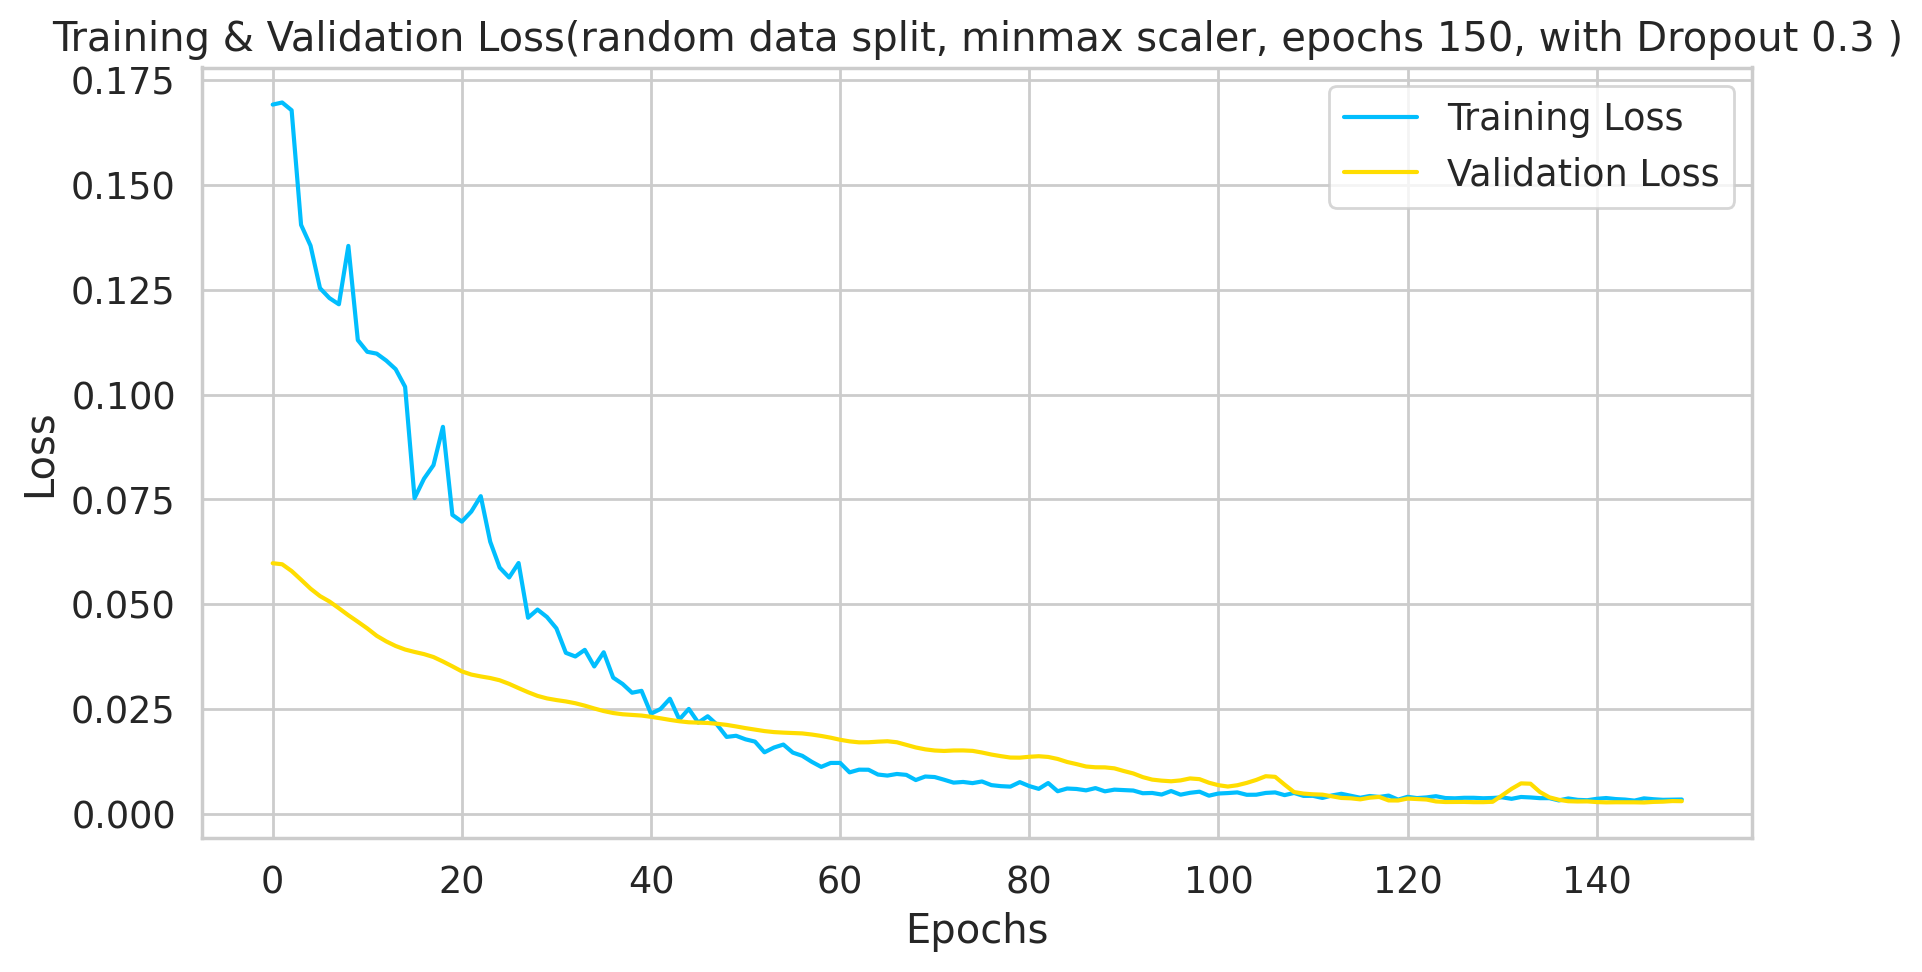

In [17]:
############ AGAIN ###############
############################ random data split, minmax scaler, hidden_dim=50, epochs 200, with Dropout 0.3 #######################
epochs = 150
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 150, with Dropout 0.3 )')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# import torch.nn as nn

# class TimeSeriesLSTM(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
#         super(TimeSeriesLSTM, self).__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
#         self.batch_norm = nn.BatchNorm1d(hidden_dim)
#         self.dropout = nn.Dropout(dropout_prob)
#         self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value (column "A")

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         out = self.batch_norm(out[:, -1, :])
#         out = self.dropout(out)
#         #out = self.dropout(out[:, -1, :])  # Take the last time step
#         out = self.fc(out)
#         return out

# model = TimeSeriesLSTM(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3)
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# print(model)

# torch.save(model.state_dict(), 'LSTM_covidprection_state_dict.pth')

# device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")  

# loaded_model = model(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3).to(device)
# model_weight_path = os.path.abspath(os.path.join(os.getcwd(),"MA_copy/Uncertainty/SHAP_everything/codes/LSTM_covidprection_state_dict.pth"))
# loaded_model.load_state_dict(torch.load(model_weight_path))


In [13]:
torch.save(model.state_dict(), 'LSTM_covidprection_state_dict_new.pth')
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")      

In [14]:
#套用模型，预测输出
loaded_model = TimeSeriesLSTM(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3).to(device)
model_weight_path = os.path.abspath(os.path.join(os.getcwd(),"/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/LSTM_covidprection_state_dict_new.pth"))
loaded_model.load_state_dict(torch.load(model_weight_path))

<All keys matched successfully>

In [15]:
print(loaded_model)

TimeSeriesLSTM(
  (lstm): LSTM(7, 50, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [26]:
# ############################ random data split, minmax scaler, epochs 200, without Dropout #######################
# epochs = 200
# train_losses = []
# val_losses = []

# for epoch in range(epochs):
#     model.train()
#     outputs = model(X_train)
#     loss = criterion(outputs.squeeze(), Y_train)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     # Validate the model
#     model.eval()  # Set the model to evaluation mode
#     with torch.no_grad():
#         val_outputs = model(X_val)
#         val_loss = criterion(val_outputs.squeeze(), Y_val)
    
#     # Store the losses for plotting
#     train_losses.append(loss.item())
#     val_losses.append(val_loss.item())
    
#     if (epoch+1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# # Plotting the training and validation loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 200, without Dropout)')
# plt.legend()
# plt.grid(True)
# plt.show()

############################# SHAP Part ##########################

In [16]:
import shap

/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

In [17]:
##################################### Validation #############################
print(X_val.size(), Y_val.size())
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
X_val = X_val.to(device)
Y_val = Y_val.to(device)
loaded_model = loaded_model.to(device)
print()

loaded_model.train()
#loaded_model.eval()
tensors_list= []
for i in range(100):
    
    outputs = loaded_model(X_val)
    print(outputs.size())
    print(outputs.squeeze().size())
    loss = criterion(outputs.squeeze(), Y_val)
    print(f"Loss at iteration {i}: {loss.item()}")
    print()
    tensors_list.append(outputs)

# Stack the tensors to create a 3D tensor of size (100, 131, 1)
stacked_tensors = torch.stack(tensors_list, dim=0)

# Compute the variance along the first dimension
variances = torch.var(stacked_tensors, dim=0, unbiased=False)

variances_2d = variances.reshape(131, 1)
print('variances_2d:', variances_2d.size())

torch.Size([131, 14, 7]) torch.Size([131])

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 0: 0.0032712072134017944

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 1: 0.0035613293293863535

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 2: 0.003085044212639332

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 3: 0.0038459356874227524

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 4: 0.004006475210189819

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 5: 0.003553960705175996

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 6: 0.00352309038862586

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 7: 0.003651656676083803

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 8: 0.003095049876719713

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 9: 0.003640179755166173

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 10: 0.0034324536100029945

torch.Size([131, 1])
torch.Size([131])
Loss at ite

In [18]:
################################################### Test #######################################
print(X_test.size(), Y_test.size())
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
X_test = X_test.to(device)
Y_test = Y_test.to(device)
loaded_model = loaded_model.to(device)
print()

loaded_model.train()
#loaded_model.eval()
for i in range(100):

    outputs = loaded_model(X_test)
    print(outputs.size())
    print(outputs.squeeze().size())
    loss = criterion(outputs.squeeze(), Y_test)
    print(f"Loss at iteration {i}: {loss.item()}")
    print()

torch.Size([67, 14, 7]) torch.Size([67])

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 0: 0.27723291516304016

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 1: 0.2756779193878174

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 2: 0.2809356451034546

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 3: 0.28531351685523987

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 4: 0.27714619040489197

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 5: 0.27679330110549927

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 6: 0.2771025598049164

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 7: 0.2763727605342865

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 8: 0.2799617052078247

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 9: 0.289344847202301

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 10: 0.2826458215713501

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 11: 0.2983577251434326

torch.Size([67, 1

In [19]:
variances_2d.shape
#Val_variances_2d= variances_2d

torch.Size([131, 1])

##################################################### VAR SHAP #######################################

In [39]:
########################## Add cariance into the original LSTM Model ###########################

class TimeSeriesLSTM_add_Var(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM_add_Var, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.batch_norm(out[:, -1, :])
        out = self.dropout(out)
        out = self.fc(out)
        return out

    def evaluate_and_compute_variance(self, X_val, Y_val, criterion, device, num_iterations= 100):
        self.to(device)
        #self.eval()  # Set the model to evaluation mode
        self.train()  # Set the model to evaluation mode
        tensors_list = []
        for i in range(num_iterations):
            outputs = self(X_val.to(device))
            loss = criterion(outputs.squeeze(), Y_val.to(device))
            print(f"Loss at iteration {i}: {loss.item()}")
            tensors_list.append(outputs)

        # Stack the tensors to create a 3D tensor of size (num_iterations, 131, 1)
        stacked_tensors = torch.stack(tensors_list, dim=0)

        # Compute the variance along the first dimension
        variances = torch.var(stacked_tensors, dim=0, unbiased=False)

        variances_2d = variances.reshape(131, 1)
        return variances_2d

# Initialize model, loss criterion, and optimizer
var_model = TimeSeriesLSTM_add_Var(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Assuming X_val and Y_val are your validation data tensors
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

############## have a try ##############################
variances_2d = var_model.evaluate_and_compute_variance(X_val, Y_val, criterion, device)
print('variances_2d:', variances_2d.size())
print(variances_2d)

Loss at iteration 0: 0.3206968307495117
Loss at iteration 1: 0.3167327642440796
Loss at iteration 2: 0.2602398693561554
Loss at iteration 3: 0.2794853448867798
Loss at iteration 4: 0.29979822039604187
Loss at iteration 5: 0.3123985230922699
Loss at iteration 6: 0.2655986249446869
Loss at iteration 7: 0.2679152488708496
Loss at iteration 8: 0.28303495049476624
Loss at iteration 9: 0.29037806391716003
Loss at iteration 10: 0.29923588037490845
Loss at iteration 11: 0.2975877523422241
Loss at iteration 12: 0.23835314810276031
Loss at iteration 13: 0.26275691390037537
Loss at iteration 14: 0.2891677916049957
Loss at iteration 15: 0.3058294951915741
Loss at iteration 16: 0.2712427079677582
Loss at iteration 17: 0.26146581768989563
Loss at iteration 18: 0.2874932289123535
Loss at iteration 19: 0.35273662209510803
Loss at iteration 20: 0.24352580308914185
Loss at iteration 21: 0.2942363917827606
Loss at iteration 22: 0.29621604084968567
Loss at iteration 23: 0.2960740625858307
Loss at iteratio

In [66]:
########################## Add variance into the original LSTM Model ###########################

class TimeSeriesLSTM_add_Var(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM_add_Var, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.batch_norm(out[:, -1, :])
        out = self.dropout(out)
        out = self.fc(out)
        return out

    def evaluate_and_compute_variance(self, X_val, Y_val, criterion, device, num_iterations= 100):
        self.to(device)
        #self.eval()  # Set the model to evaluation mode
        self.train()  # Set the model to evaluation mode
        tensors_list = []
        for i in range(num_iterations):
            outputs = self(X_val.to(device))
            loss = criterion(outputs.squeeze(), Y_val.to(device))
            print(f"Loss at iteration {i}: {loss.item()}")
            tensors_list.append(outputs)

        # Stack the tensors to create a 3D tensor of size (num_iterations, 131, 1)
        stacked_tensors = torch.stack(tensors_list, dim=0)

        # Compute the variance along the first dimension
        variances = torch.var(stacked_tensors, dim=0, unbiased=False)

        variances_2d = variances.reshape(131, 1)
        return variances_2d

# Initialize model, loss criterion, and optimizer
var_model = TimeSeriesLSTM_add_Var(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Assuming X_val and Y_val are your validation data tensors
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

############## have a try ##############################
variances_2d = var_model.evaluate_and_compute_variance(X_val, Y_val, criterion, device)
print('variances_2d:', variances_2d.size())
print(variances_2d)

Loss at iteration 0: 0.33562609553337097
Loss at iteration 1: 0.29125866293907166
Loss at iteration 2: 0.3048565983772278
Loss at iteration 3: 0.2990410029888153
Loss at iteration 4: 0.31316685676574707
Loss at iteration 5: 0.38185182213783264
Loss at iteration 6: 0.32347583770751953
Loss at iteration 7: 0.3753754198551178
Loss at iteration 8: 0.32281404733657837
Loss at iteration 9: 0.2937707006931305
Loss at iteration 10: 0.2933884263038635
Loss at iteration 11: 0.32253730297088623
Loss at iteration 12: 0.3575513958930969
Loss at iteration 13: 0.3467061221599579
Loss at iteration 14: 0.3236929774284363
Loss at iteration 15: 0.3037995398044586
Loss at iteration 16: 0.32719144225120544
Loss at iteration 17: 0.3111025393009186
Loss at iteration 18: 0.3914962112903595
Loss at iteration 19: 0.32556813955307007
Loss at iteration 20: 0.30384886264801025
Loss at iteration 21: 0.31739911437034607
Loss at iteration 22: 0.33662280440330505
Loss at iteration 23: 0.3659127950668335
Loss at iterat

In [1]:
# Assuming `model` is your trained LSTM model in PyTorch
background = X_train[:459]  # or whatever subset you choose
#background= background.to(device)
print('background:', type(background),background.size())
print()
#loaded_model.train()
var_model.train()
#loaded_model.train()
print(type(loaded_model))
print()

#如果问题持续存在，作为一种可能的解决方案，可以尝试不使用 CuDNN 优化的 RNN。这可以通过在模型初始化前设置 torch.backends.cudnn.enabled = False 来实现，但请注意这可能会影响模型的性能。
torch.backends.cudnn.enabled = False
#######################################      Kernel_Explainer  #############################################
#explainer= shap.KernelExplainer(model, x_train_std.to_numpy().astype(np.float32)) # x is DataFrame here

#######################################      Deep_Explainer    #############################################
explainer= shap.DeepExplainer(var_model, background.to(device))
#explainer= shap.DeepExplainer(loaded_model, background.to(device))

############################# SHAP which data ############################
#shap_values = explainer.shap_values(X_test)
shap_values = explainer.shap_values(X_val)
#Val_variances_2d
print('############')
print('shap_values:', type(shap_values), shap_values.shape)
print('explainer.expected_value:', type(explainer.expected_value), explainer.expected_value.shape, explainer.expected_value)

NameError: name 'X_train' is not defined

In [68]:
#print(shap_values, type(shap_values), len(shap_values))
# shap_values_np= np.array(shap_values)
# print(shap_values_np.shape)

print(shap_values.sum())
#so called basci value of whole test data, the average prediction value of whole testsets
print('###################')
print(shap_values[0, 0, :])
print(shap_values[0, 1, :])
print()
print(shap_values[0].shape, X_test[0].shape, Y_test[0].shape, Y_test[0])

print()
print(shap_values[0, 0, :].shape)

-1.3265071734759317
###################
[ 3.98420263e-04 -2.26212942e-04  7.99037574e-04  3.05378257e-04
  1.84211764e-04  2.34790114e-05  6.09744689e-04]
[ 5.13260369e-04 -3.86474770e-04  1.57422700e-03  4.86815086e-04
  2.40584050e-04  1.16082510e-05 -7.03026017e-04]

(14, 7) torch.Size([14, 7]) torch.Size([]) tensor(0.3161, device='cuda:3')

(7,)


torch.Size([14, 7]) (14, 7)


[[0.21638729 0.7842005  0.47559943 0.8527501  0.1684017  0.01247765
  0.67456282]
 [0.23198674 0.7518872  0.45199846 0.84555975 0.16257648 0.00794001
  0.67587559]
 [0.20933024 0.88329283 0.52851112 0.85190808 0.15461847 0.00973386
  0.67652144]
 [0.23863826 0.77271449 0.52270677 0.82761393 0.1694567  0.01743668
  0.67754433]
 [0.15957945 0.76852374 0.46860764 0.61140057 0.34688565 0.1827834
  0.67916924]
 [0.16043282 0.72590283 0.48408688 0.49491921 0.13829666 0.01584819
  0.68161543]
 [0.25180886 0.70175496 0.51712866 0.73639597 0.13077816 0.01469146
  0.68523367]
 [0.26507857 0.75715527 0.5703861  0.65653858 0.16455237 0.02251375
  0.6904273 ]
 [0.27469889 0.59765436 0.65779749 0.66505024 0.13950576 0.01237451
  0.6976244 ]
 [0.23354477 0.59518452 0.53650659 0.66101199 0.17709555 0.01702546
  0.70684277]
 [0.26581339 0.67182613 0.41061297 0.66843668 0.18698377 0.01358945
  0.71739569]
 [0.16209362 0.73143364 0.41679094 0.48928724 0.29488465 0.17561202
 

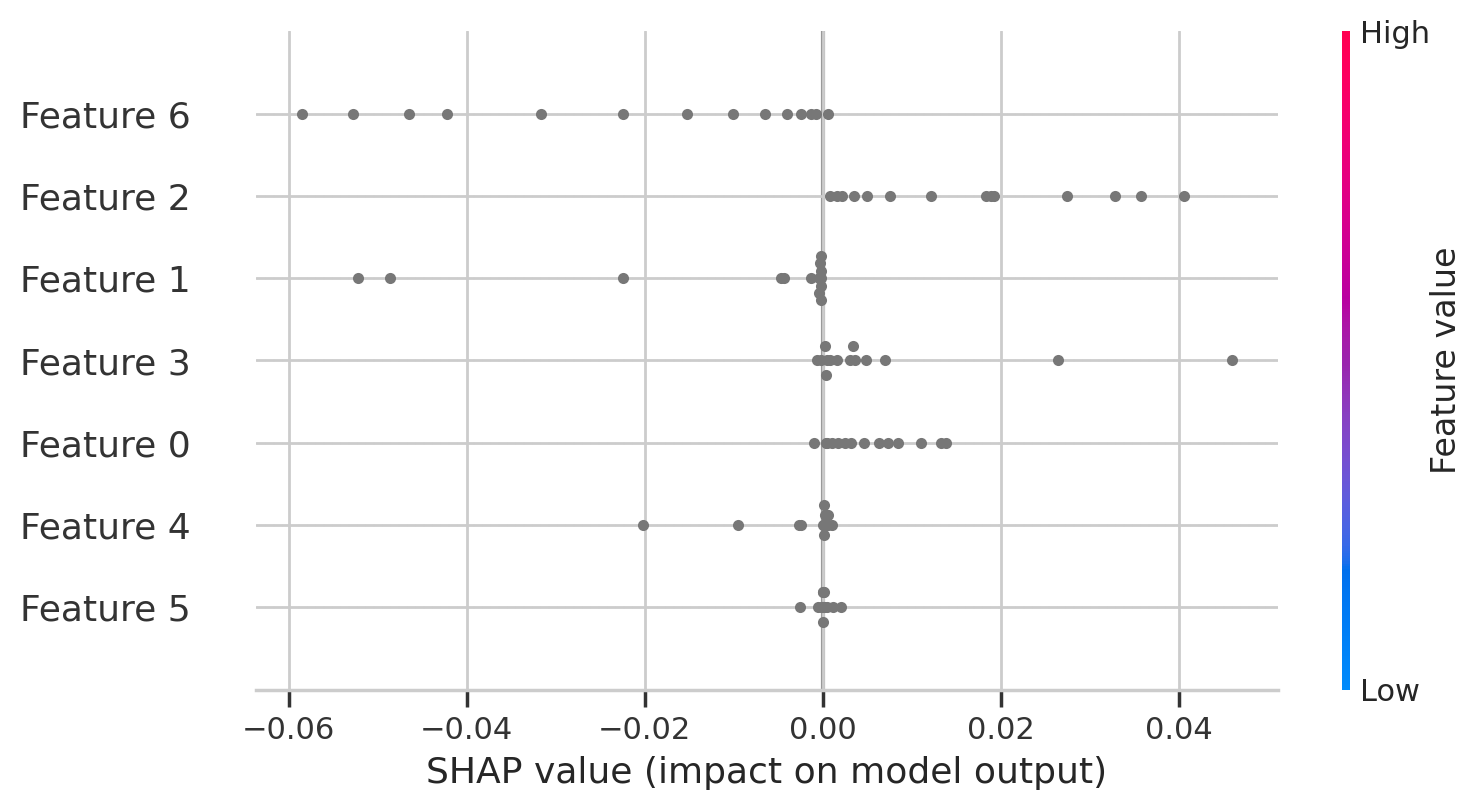

In [69]:
import matplotlib.pyplot as plt
print(X_test[0].shape, shap_values[0].shape)

shap.summary_plot(shap_values[0], X_test[0], show= False)
#print(X_test[0])
print()
#print(shap_values[0])
print()
print(X_test[0].cpu().numpy()- shap_values[0])

(14, 7) torch.Size([14, 7])
tensor([[0.2325, 0.7515, 0.4536, 0.8460, 0.1628, 0.0080, 0.6752],
        [0.2104, 0.8831, 0.5307, 0.8527, 0.1547, 0.0097, 0.6752],
        [0.2404, 0.7725, 0.5263, 0.8280, 0.1699, 0.0175, 0.6752],
        [0.1621, 0.7684, 0.4736, 0.6112, 0.3479, 0.1830, 0.6752],
        [0.1636, 0.7257, 0.4916, 0.4965, 0.1389, 0.0160, 0.6752],
        [0.2564, 0.7015, 0.5293, 0.7394, 0.1312, 0.0148, 0.6752],
        [0.2714, 0.7567, 0.5887, 0.6599, 0.1647, 0.0226, 0.6752],
        [0.2832, 0.5963, 0.6853, 0.6700, 0.1395, 0.0123, 0.6752],
        [0.2446, 0.5908, 0.5771, 0.6680, 0.1777, 0.0145, 0.6752],
        [0.2796, 0.6671, 0.4464, 0.6721, 0.1843, 0.0148, 0.6752],
        [0.1754, 0.7090, 0.4357, 0.4887, 0.2747, 0.1777, 0.6752],
        [0.1682, 0.6579, 0.4259, 0.4053, 0.1094, 0.0100, 0.6752],
        [0.3196, 0.6966, 0.4361, 0.6745, 0.1431, 0.0088, 0.6752],
        [0.3161, 0.7790, 0.5199, 0.6932, 0.1623, 0.0161, 0.6752]],
       device='cuda:3')


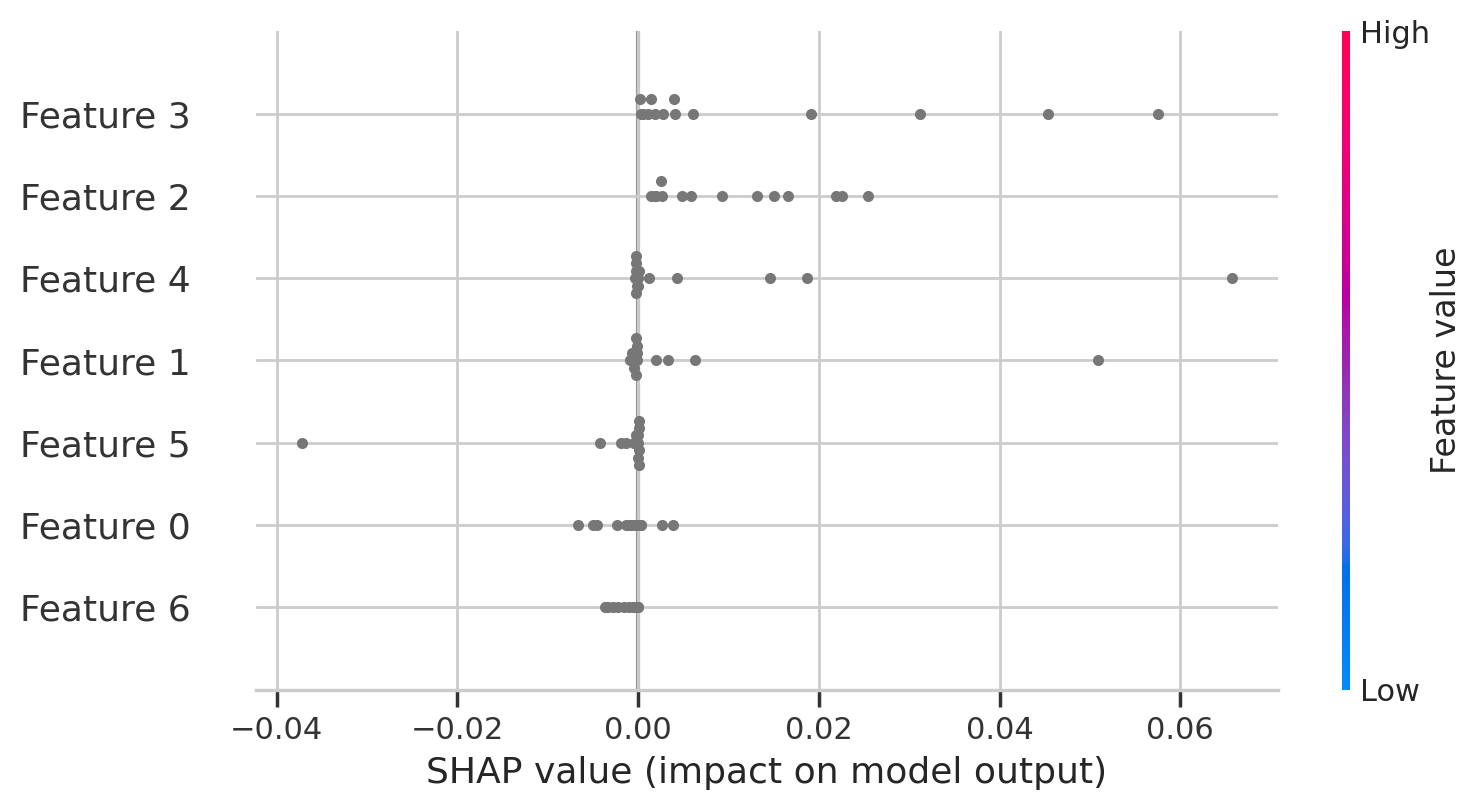

In [70]:
import matplotlib.pyplot as plt
print(shap_values[1].shape, X_test[1].shape)
shap.summary_plot(shap_values[1], X_test[1], show= False)
print(X_test[1])

(14, 7) torch.Size([14, 7])
tensor([[0.2714, 0.7567, 0.5887, 0.6599, 0.1647, 0.0226, 0.6752],
        [0.2832, 0.5963, 0.6853, 0.6700, 0.1395, 0.0123, 0.6752],
        [0.2446, 0.5908, 0.5771, 0.6680, 0.1777, 0.0145, 0.6752],
        [0.2796, 0.6671, 0.4464, 0.6721, 0.1843, 0.0148, 0.6752],
        [0.1754, 0.7090, 0.4357, 0.4887, 0.2747, 0.1777, 0.6752],
        [0.1682, 0.6579, 0.4259, 0.4053, 0.1094, 0.0100, 0.6752],
        [0.3196, 0.6966, 0.4361, 0.6745, 0.1431, 0.0088, 0.6752],
        [0.3161, 0.7790, 0.5199, 0.6932, 0.1623, 0.0161, 0.6752],
        [0.3357, 0.7698, 0.5577, 0.7436, 0.1761, 0.0200, 0.6752],
        [0.3168, 0.7405, 0.5197, 0.8176, 0.1610, 0.0085, 0.6752],
        [0.3411, 0.6886, 0.4863, 0.8960, 0.2101, 0.0172, 0.6752],
        [0.2346, 0.5947, 0.5145, 0.7018, 0.3365, 0.1411, 0.6752],
        [0.1782, 0.5752, 0.6052, 0.6364, 0.1400, 0.0130, 0.6752],
        [0.4700, 0.7707, 0.5236, 0.8902, 0.1750, 0.0091, 0.6752]],
       device='cuda:3')


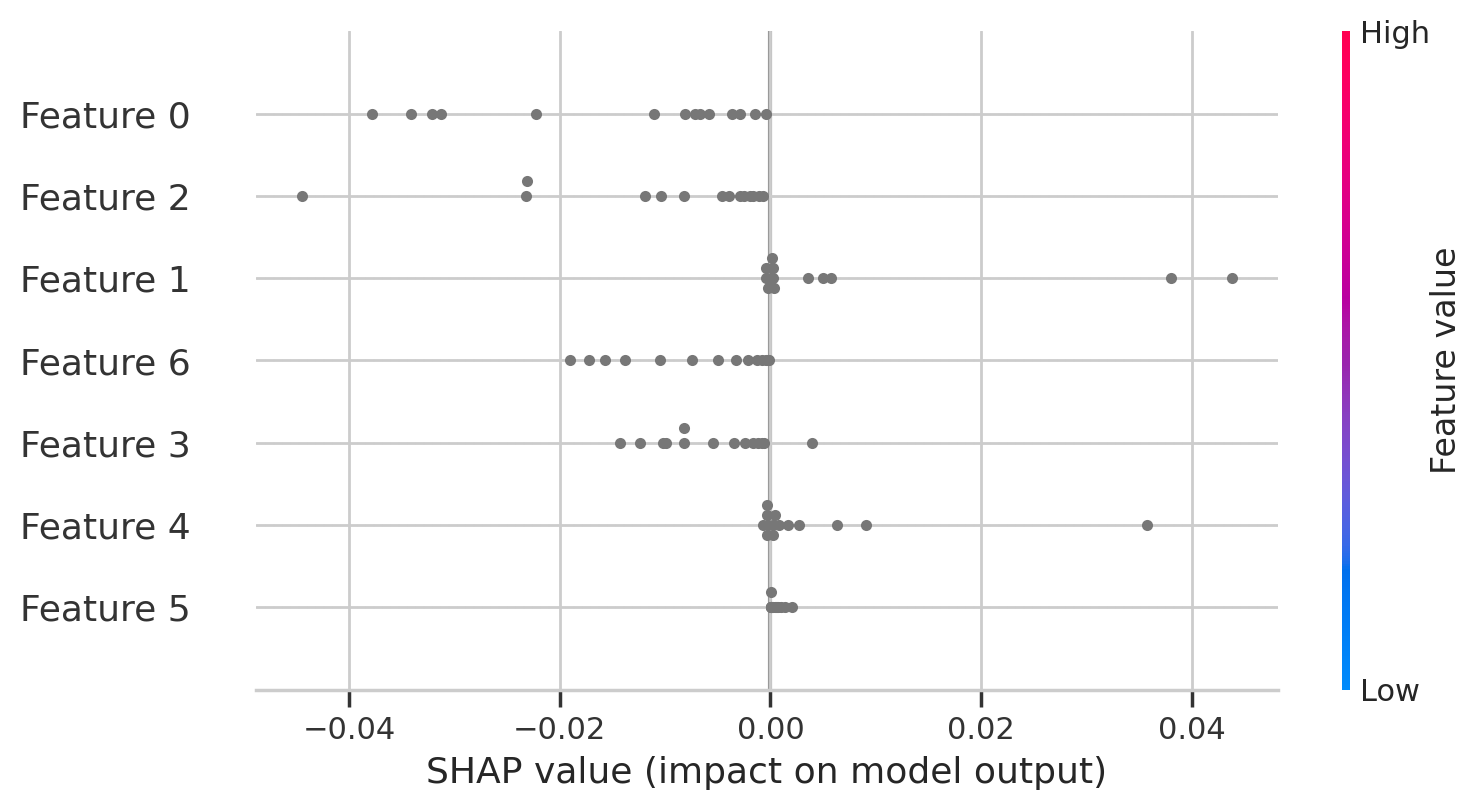

In [71]:
import matplotlib.pyplot as plt
print(shap_values[7].shape, X_test[7].shape)
shap.summary_plot(shap_values[7], X_test[7], show= False)
print(X_test[7])

(14, 7) torch.Size([14, 7])
tensor([[0.3161, 0.7790, 0.5199, 0.6932, 0.1623, 0.0161, 0.6752],
        [0.3357, 0.7698, 0.5577, 0.7436, 0.1761, 0.0200, 0.6752],
        [0.3168, 0.7405, 0.5197, 0.8176, 0.1610, 0.0085, 0.6752],
        [0.3411, 0.6886, 0.4863, 0.8960, 0.2101, 0.0172, 0.6752],
        [0.2346, 0.5947, 0.5145, 0.7018, 0.3365, 0.1411, 0.6752],
        [0.1782, 0.5752, 0.6052, 0.6364, 0.1400, 0.0130, 0.6752],
        [0.4700, 0.7707, 0.5236, 0.8902, 0.1750, 0.0091, 0.6752],
        [0.4686, 0.8761, 0.4709, 0.9046, 0.1962, 0.0194, 0.6752],
        [0.5121, 0.8710, 0.4326, 0.9260, 0.1715, 0.0076, 0.6752],
        [0.5100, 0.9252, 0.4324, 0.9532, 0.2934, 0.0634, 0.6752],
        [0.5157, 0.8572, 0.4511, 0.9771, 0.2342, 0.0237, 0.6752],
        [0.3436, 0.7635, 0.4553, 0.7250, 0.2350, 0.0127, 0.6752],
        [0.2679, 0.7563, 0.4531, 0.5919, 0.1505, 0.0370, 0.6752],
        [0.7746, 0.8278, 0.4548, 0.9215, 0.1635, 0.0072, 0.6752]],
       device='cuda:3')


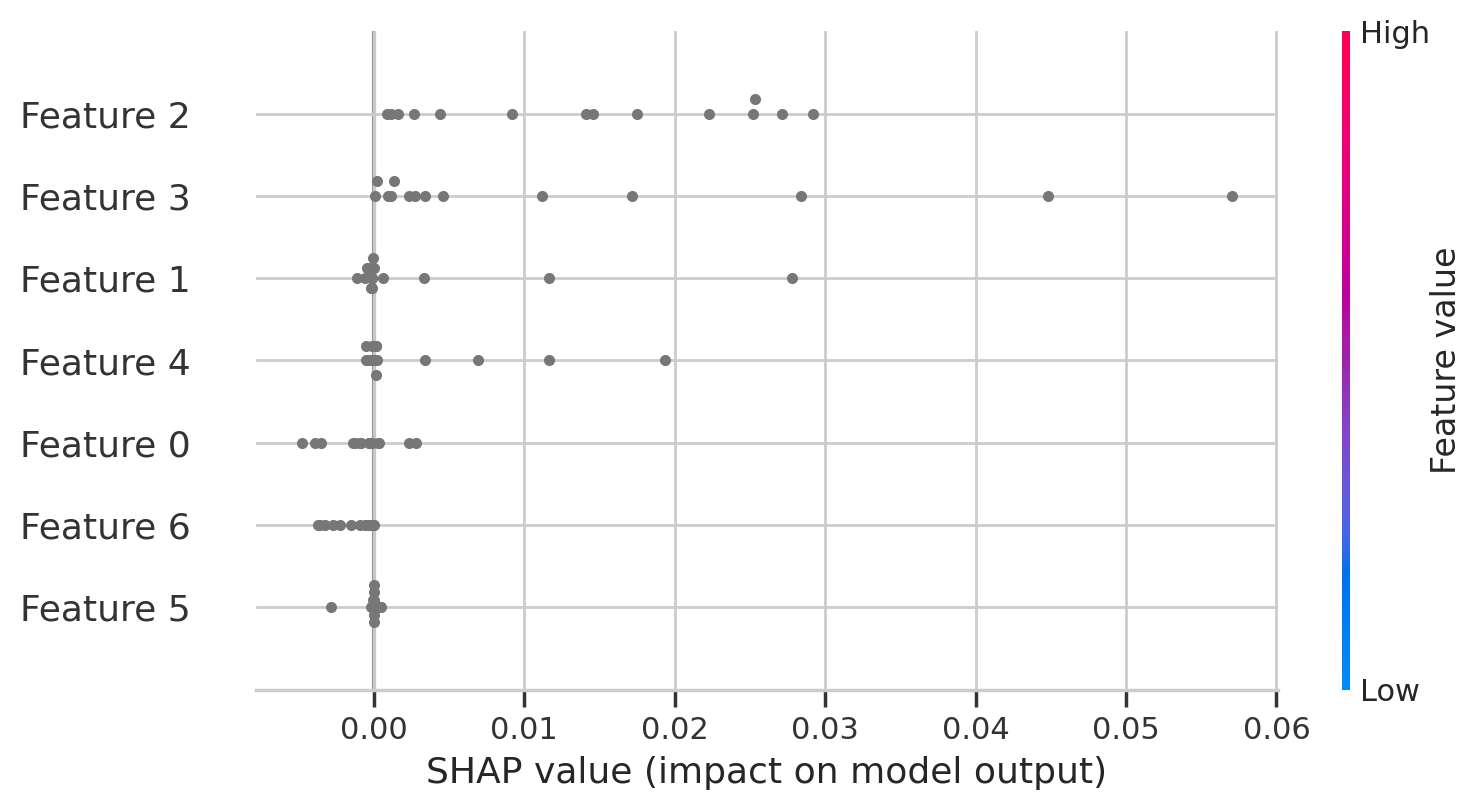

In [72]:
import matplotlib.pyplot as plt
print(shap_values[14].shape, X_test[14].shape)
shap.summary_plot(shap_values[14], X_test[14], show= False)
print(X_test[14])

(14, 7) torch.Size([14, 7])
tensor([[0.8554, 0.8243, 0.3683, 0.9511, 0.1853, 0.0075, 0.6752],
        [0.7357, 0.9099, 0.3762, 0.9675, 0.2020, 0.0148, 0.6752],
        [0.7296, 0.9198, 0.3873, 0.9633, 0.1887, 0.0086, 0.6752],
        [0.4196, 0.8811, 0.3914, 0.7105, 0.3160, 0.0998, 0.6752],
        [0.3332, 0.8713, 0.4290, 0.5882, 0.1042, 0.0062, 0.6752],
        [0.9421, 0.8144, 0.3988, 0.9312, 0.1823, 0.0059, 0.6752],
        [0.8996, 0.8752, 0.3902, 0.9241, 0.2273, 0.0121, 0.6752],
        [0.9357, 0.8602, 0.3936, 0.9466, 0.1880, 0.0107, 0.6752],
        [0.7889, 0.8190, 0.4488, 0.9736, 0.1935, 0.0455, 0.6752],
        [0.7736, 0.8291, 0.5185, 0.9759, 0.1606, 0.0149, 0.6752],
        [0.3868, 0.7894, 0.5048, 0.7186, 0.1747, 0.0528, 0.6752],
        [0.3268, 0.8654, 0.4235, 0.5878, 0.0651, 0.0070, 0.6752],
        [1.0000, 0.7862, 0.3370, 0.9118, 0.1427, 0.0082, 0.6752],
        [0.8461, 0.8940, 0.3513, 0.9214, 0.1510, 0.0158, 0.6752]],
       device='cuda:3')


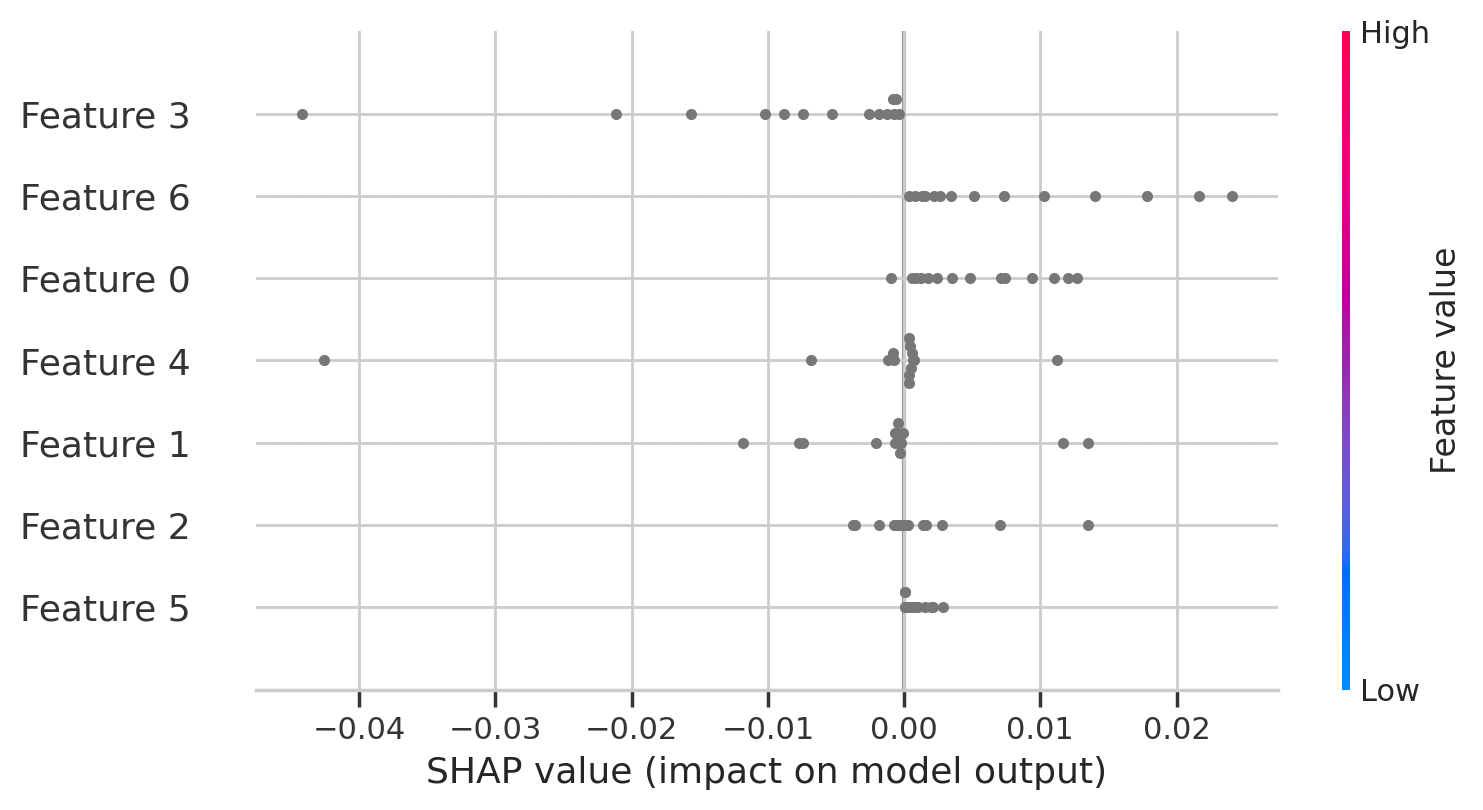

In [73]:
import matplotlib.pyplot as plt
print(shap_values[29].shape, X_test[29].shape)
shap.summary_plot(shap_values[29], X_test[29], show= False)
print(X_test[29])

(14, 7) torch.Size([14, 7])
tensor([[0.8868, 0.8596, 0.3830, 0.9263, 0.1487, 0.0102, 0.6752],
        [0.7925, 0.7514, 0.3272, 0.9590, 0.1519, 0.0092, 0.6752],
        [0.8246, 0.7617, 0.3217, 0.9907, 0.1704, 0.0138, 0.6752],
        [0.3814, 0.8243, 0.2954, 0.7277, 0.1891, 0.0188, 0.6752],
        [0.2971, 0.9122, 0.2681, 0.5862, 0.1239, 0.0124, 0.6752],
        [0.8518, 0.8844, 0.2793, 0.9250, 0.1827, 0.0133, 0.6752],
        [0.8214, 0.8116, 0.3299, 0.9150, 0.1614, 0.0093, 0.6752],
        [0.7529, 0.7856, 0.4064, 0.9373, 0.1732, 0.0171, 0.6752],
        [0.7875, 0.6929, 0.2953, 0.9759, 0.2356, 0.0192, 0.6752],
        [0.7464, 0.7209, 0.2545, 1.0000, 0.2731, 0.0367, 0.6752],
        [0.3782, 0.8951, 0.2977, 0.7474, 0.3004, 0.0435, 0.6752],
        [0.2889, 0.8995, 0.2869, 0.5968, 0.1346, 0.0034, 0.6752],
        [0.8543, 0.8880, 0.2539, 0.9375, 0.1956, 0.0098, 0.6752],
        [0.8132, 0.8386, 0.2501, 0.9385, 0.1816, 0.0086, 0.6752]],
       device='cuda:3')


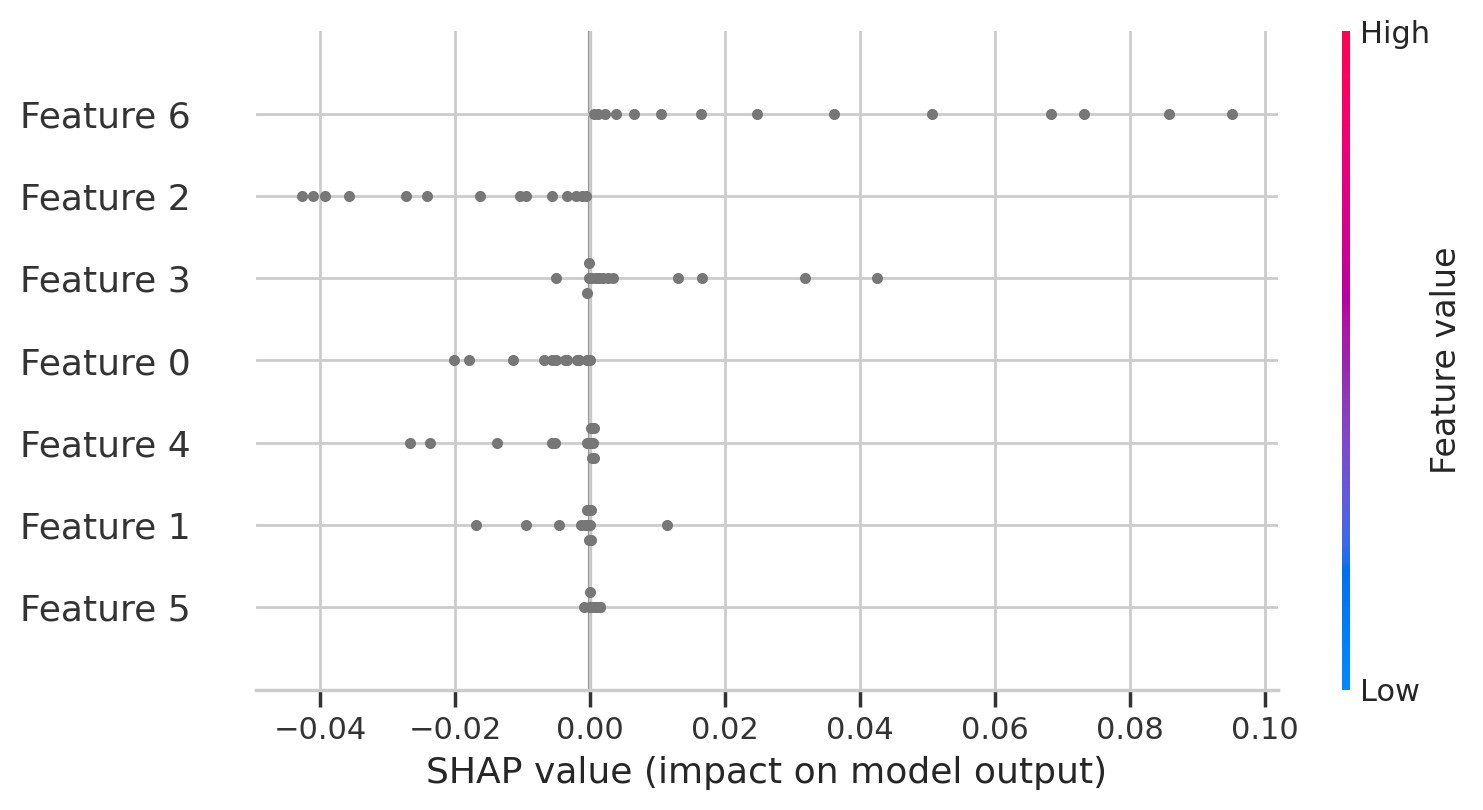

In [74]:
import matplotlib.pyplot as plt
print(shap_values[43].shape, X_test[43].shape)
shap.summary_plot(shap_values[43], X_test[43], show= False)
print(X_test[43])

(14, 7) torch.Size([14, 7])
tensor([[0.7293, 0.8830, 0.3786, 0.8597, 0.1984, 0.0108, 0.6413],
        [0.3239, 0.9339, 0.3817, 0.6829, 0.2407, 0.0187, 0.6413],
        [0.2504, 0.8314, 0.3789, 0.5364, 0.1431, 0.0055, 0.6413],
        [0.8929, 0.7898, 0.2627, 0.8744, 0.2059, 0.0094, 0.6413],
        [0.7946, 0.8717, 0.2026, 0.9072, 0.2437, 0.0127, 0.6413],
        [0.7200, 0.8021, 0.1703, 0.9027, 0.2555, 0.0126, 0.6413],
        [0.6546, 0.7896, 0.2194, 0.8221, 0.2229, 0.0119, 0.6413],
        [0.4186, 0.8736, 0.3379, 0.6309, 0.2124, 0.0122, 0.6413],
        [0.4482, 0.7923, 0.1303, 0.5167, 0.1216, 0.0012, 0.6413],
        [0.4321, 0.7325, 0.0957, 0.4929, 0.1498, 0.0072, 0.6413],
        [0.9246, 0.7623, 0.2096, 0.6573, 0.1990, 0.0399, 0.6413],
        [0.8943, 0.8520, 0.3022, 0.6836, 0.1670, 0.0079, 0.6413],
        [0.8868, 0.9693, 0.3892, 0.7007, 0.1710, 0.0152, 0.6413],
        [0.8957, 0.9412, 0.5302, 0.7228, 0.1862, 0.0192, 0.6413]],
       device='cuda:3')


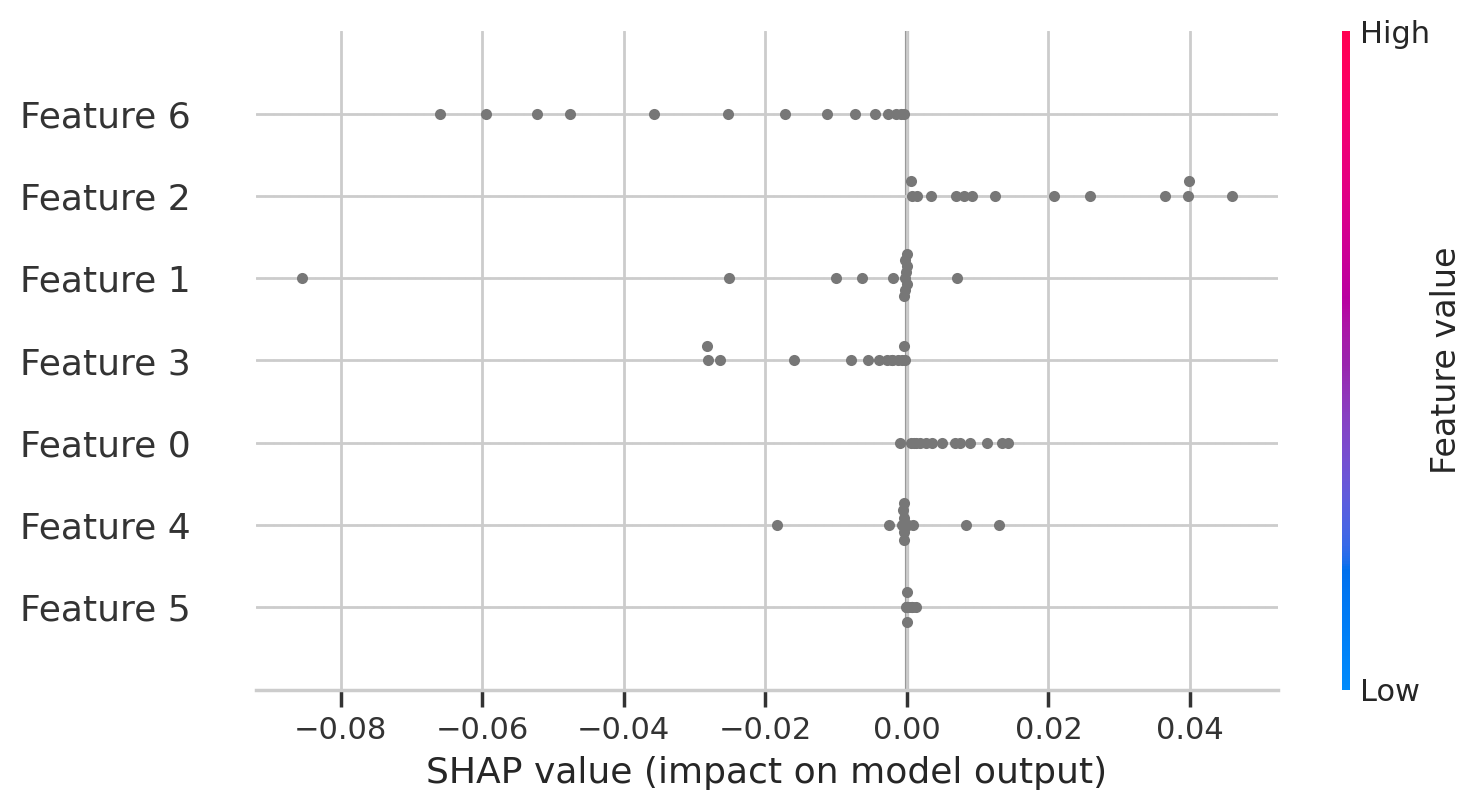

In [75]:
import matplotlib.pyplot as plt
print(shap_values[66].shape, X_test[66].shape)
shap.summary_plot(shap_values[66], X_test[66], show= False)
print(X_test[66])

In [76]:
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [111]:
shap.plots.waterfall(shap_values[0])

AttributeError: 'numpy.float32' object has no attribute 'base_values'

In [112]:
shap.plots.heatmap(shap_values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

########################################################## ORIGINAL SHAP ###################################################

In [77]:
# Assuming `model` is your trained LSTM model in PyTorch
background = X_train[:459]  # or whatever subset you choose
#background= background.to(device)
print('background:', type(background),background.size())
print()
#loaded_model.train()
#var_model.train()
loaded_model.train()
print(type(loaded_model))
print()

#如果问题持续存在，作为一种可能的解决方案，可以尝试不使用 CuDNN 优化的 RNN。这可以通过在模型初始化前设置 torch.backends.cudnn.enabled = False 来实现，但请注意这可能会影响模型的性能。
torch.backends.cudnn.enabled = False
#######################################      Kernel_Explainer  #############################################
#explainer= shap.KernelExplainer(model, x_train_std.to_numpy().astype(np.float32)) # x is DataFrame here

#######################################      Deep_Explainer    #############################################
#explainer= shap.DeepExplainer(var_model, background.to(device))
explainer= shap.DeepExplainer(loaded_model, background.to(device))

############################# SHAP which data ############################
#shap_values = explainer.shap_values(X_test)
shap_values = explainer.shap_values(X_val)
#Val_variances_2d
print('############')
print('shap_values:', type(shap_values), shap_values.shape)
print('explainer.expected_value:', explainer.expected_value.shape, explainer.expected_value)

background: <class 'torch.Tensor'> torch.Size([459, 14, 7])

<class '__main__.TimeSeriesLSTM'>

############
shap_values: <class 'numpy.ndarray'> (131, 14, 7)
explainer.expected_value: (1,) [-0.2717268]


In [78]:
#print(shap_values, type(shap_values), len(shap_values))
# shap_values_np= np.array(shap_values)
# print(shap_values_np.shape)

print(shap_values.sum())
#so called basci value of whole test data, the average prediction value of whole testsets
print('###################')
print(shap_values[0, 0, :])
print(shap_values[0, 1, :])
print()
print(shap_values[0].shape, X_test[0].shape, Y_test[0].shape, Y_test[0])

print()
print(shap_values[0, 0, :].shape)

-3.669380377383053
###################
[-7.13065092e-05  2.02334675e-04  8.51268778e-05  2.11644583e-04
 -4.82257656e-06 -1.08155473e-05  3.34721437e-04]
[-1.02558937e-04  3.39156220e-04  1.47225772e-04  4.40684060e-04
 -3.11376425e-05 -5.41632289e-06 -2.35640269e-04]

(14, 7) torch.Size([14, 7]) torch.Size([]) tensor(0.3161, device='cuda:3')

(7,)


(14, 7) torch.Size([14, 7])
tensor([[0.2168, 0.7840, 0.4764, 0.8531, 0.1686, 0.0125, 0.6752],
        [0.2325, 0.7515, 0.4536, 0.8460, 0.1628, 0.0080, 0.6752],
        [0.2104, 0.8831, 0.5307, 0.8527, 0.1547, 0.0097, 0.6752],
        [0.2404, 0.7725, 0.5263, 0.8280, 0.1699, 0.0175, 0.6752],
        [0.1621, 0.7684, 0.4736, 0.6112, 0.3479, 0.1830, 0.6752],
        [0.1636, 0.7257, 0.4916, 0.4965, 0.1389, 0.0160, 0.6752],
        [0.2564, 0.7015, 0.5293, 0.7394, 0.1312, 0.0148, 0.6752],
        [0.2714, 0.7567, 0.5887, 0.6599, 0.1647, 0.0226, 0.6752],
        [0.2832, 0.5963, 0.6853, 0.6700, 0.1395, 0.0123, 0.6752],
        [0.2446, 0.5908, 0.5771, 0.6680, 0.1777, 0.0145, 0.6752],
        [0.2796, 0.6671, 0.4464, 0.6721, 0.1843, 0.0148, 0.6752],
        [0.1754, 0.7090, 0.4357, 0.4887, 0.2747, 0.1777, 0.6752],
        [0.1682, 0.6579, 0.4259, 0.4053, 0.1094, 0.0100, 0.6752],
        [0.3196, 0.6966, 0.4361, 0.6745, 0.1431, 0.0088, 0.6752]],
       device='cuda:3')

[[-7.13065092e-05  2.0

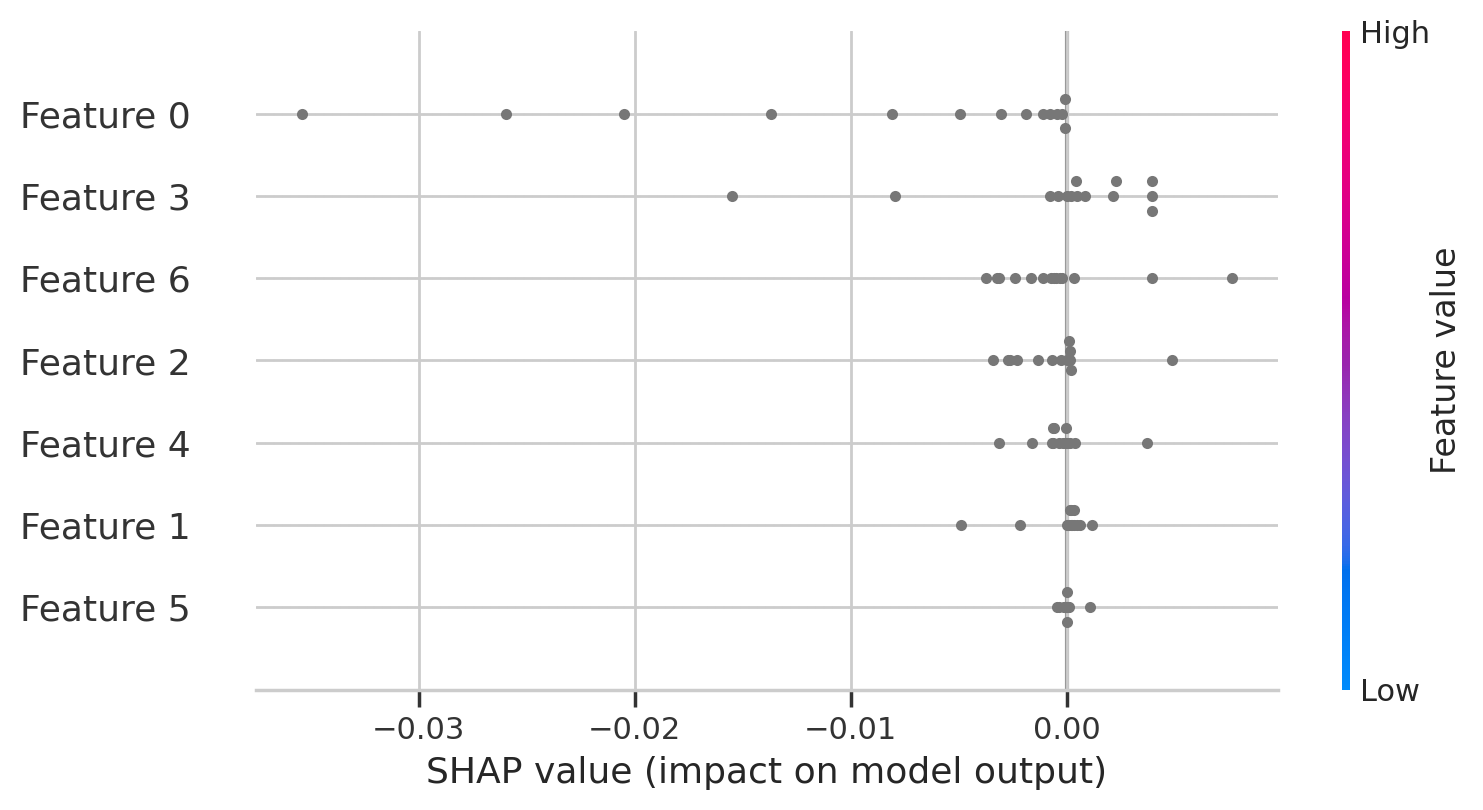

In [79]:
import matplotlib.pyplot as plt
print(shap_values[0].shape, X_test[0].shape)

shap.summary_plot(shap_values[0], X_test[0], show= False)
print(X_test[0])
print()
print(shap_values[0])

(14, 7) torch.Size([14, 7])
tensor([[0.2325, 0.7515, 0.4536, 0.8460, 0.1628, 0.0080, 0.6752],
        [0.2104, 0.8831, 0.5307, 0.8527, 0.1547, 0.0097, 0.6752],
        [0.2404, 0.7725, 0.5263, 0.8280, 0.1699, 0.0175, 0.6752],
        [0.1621, 0.7684, 0.4736, 0.6112, 0.3479, 0.1830, 0.6752],
        [0.1636, 0.7257, 0.4916, 0.4965, 0.1389, 0.0160, 0.6752],
        [0.2564, 0.7015, 0.5293, 0.7394, 0.1312, 0.0148, 0.6752],
        [0.2714, 0.7567, 0.5887, 0.6599, 0.1647, 0.0226, 0.6752],
        [0.2832, 0.5963, 0.6853, 0.6700, 0.1395, 0.0123, 0.6752],
        [0.2446, 0.5908, 0.5771, 0.6680, 0.1777, 0.0145, 0.6752],
        [0.2796, 0.6671, 0.4464, 0.6721, 0.1843, 0.0148, 0.6752],
        [0.1754, 0.7090, 0.4357, 0.4887, 0.2747, 0.1777, 0.6752],
        [0.1682, 0.6579, 0.4259, 0.4053, 0.1094, 0.0100, 0.6752],
        [0.3196, 0.6966, 0.4361, 0.6745, 0.1431, 0.0088, 0.6752],
        [0.3161, 0.7790, 0.5199, 0.6932, 0.1623, 0.0161, 0.6752]],
       device='cuda:3')

[[ 3.79964586e-05  1.1

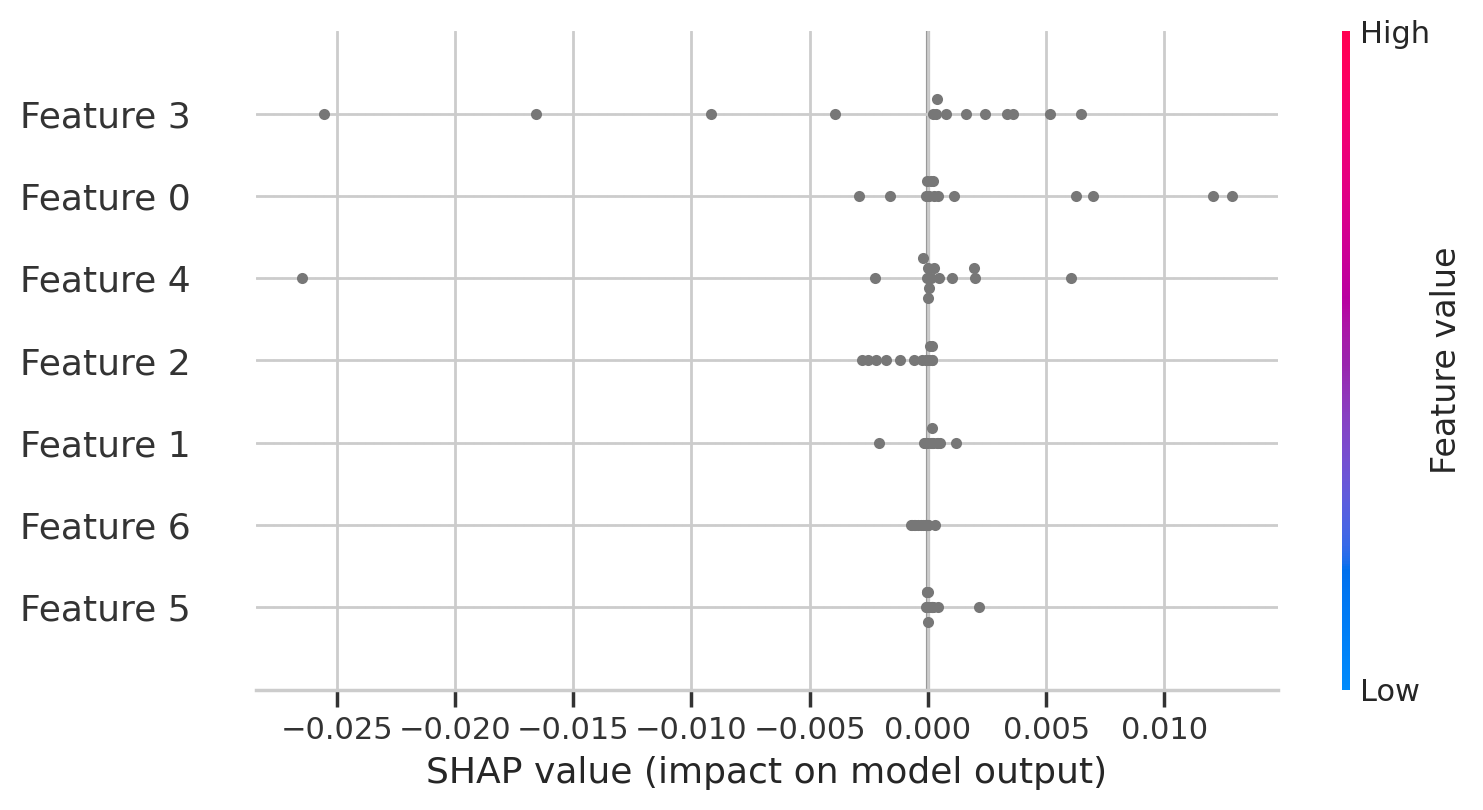

In [80]:
import matplotlib.pyplot as plt
print(shap_values[1].shape, X_test[1].shape)
shap.summary_plot(shap_values[1], X_test[1], show= False)
print(X_test[1])
print()
print(shap_values[1])

(14, 7) torch.Size([14, 7])
tensor([[0.2714, 0.7567, 0.5887, 0.6599, 0.1647, 0.0226, 0.6752],
        [0.2832, 0.5963, 0.6853, 0.6700, 0.1395, 0.0123, 0.6752],
        [0.2446, 0.5908, 0.5771, 0.6680, 0.1777, 0.0145, 0.6752],
        [0.2796, 0.6671, 0.4464, 0.6721, 0.1843, 0.0148, 0.6752],
        [0.1754, 0.7090, 0.4357, 0.4887, 0.2747, 0.1777, 0.6752],
        [0.1682, 0.6579, 0.4259, 0.4053, 0.1094, 0.0100, 0.6752],
        [0.3196, 0.6966, 0.4361, 0.6745, 0.1431, 0.0088, 0.6752],
        [0.3161, 0.7790, 0.5199, 0.6932, 0.1623, 0.0161, 0.6752],
        [0.3357, 0.7698, 0.5577, 0.7436, 0.1761, 0.0200, 0.6752],
        [0.3168, 0.7405, 0.5197, 0.8176, 0.1610, 0.0085, 0.6752],
        [0.3411, 0.6886, 0.4863, 0.8960, 0.2101, 0.0172, 0.6752],
        [0.2346, 0.5947, 0.5145, 0.7018, 0.3365, 0.1411, 0.6752],
        [0.1782, 0.5752, 0.6052, 0.6364, 0.1400, 0.0130, 0.6752],
        [0.4700, 0.7707, 0.5236, 0.8902, 0.1750, 0.0091, 0.6752]],
       device='cuda:3')


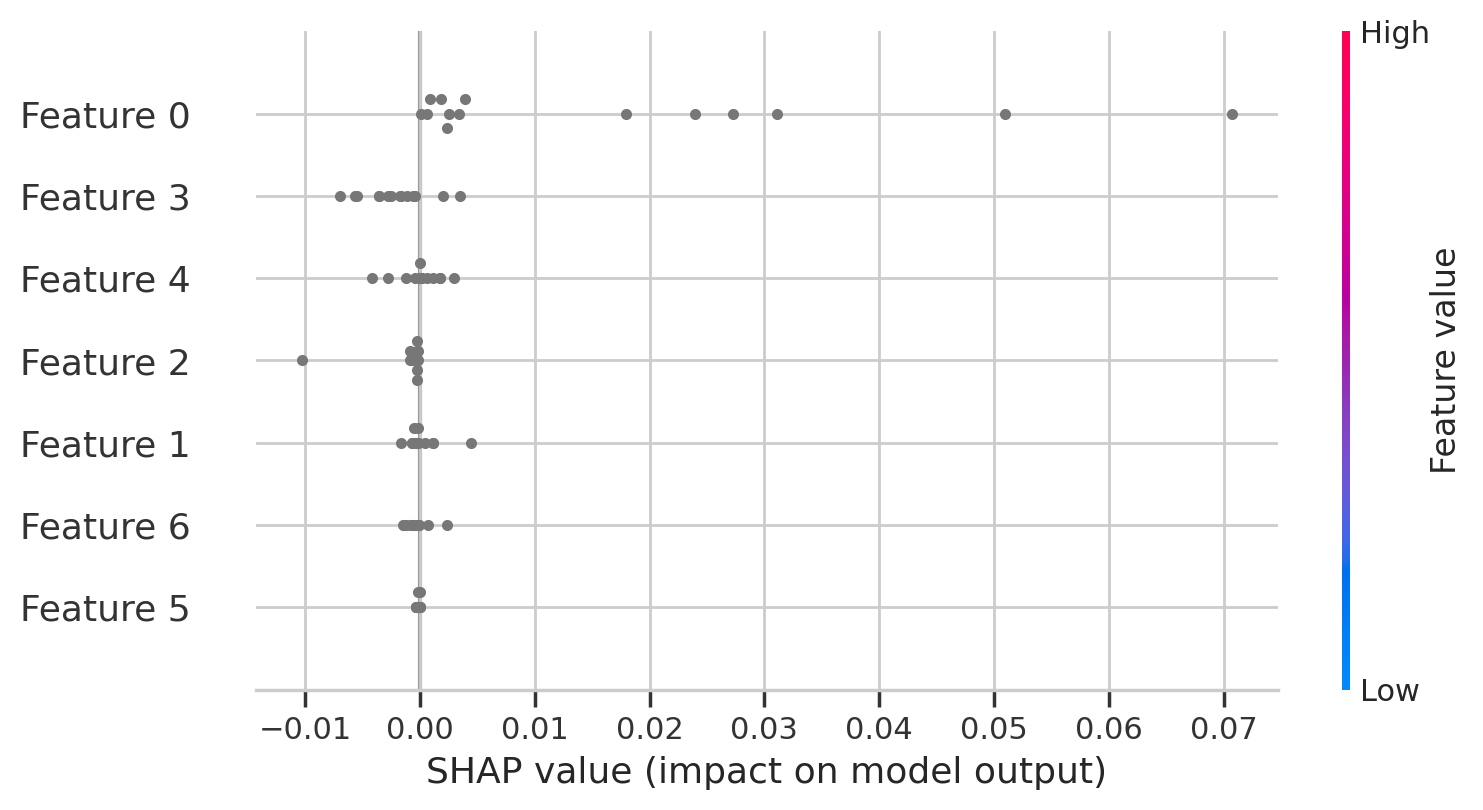

In [53]:
import matplotlib.pyplot as plt
print(shap_values[7].shape, X_test[7].shape)
shap.summary_plot(shap_values[7], X_test[7], show= False)
print(X_test[7])

(14, 7) torch.Size([14, 7])
tensor([[0.3161, 0.7790, 0.5199, 0.6932, 0.1623, 0.0161, 0.6752],
        [0.3357, 0.7698, 0.5577, 0.7436, 0.1761, 0.0200, 0.6752],
        [0.3168, 0.7405, 0.5197, 0.8176, 0.1610, 0.0085, 0.6752],
        [0.3411, 0.6886, 0.4863, 0.8960, 0.2101, 0.0172, 0.6752],
        [0.2346, 0.5947, 0.5145, 0.7018, 0.3365, 0.1411, 0.6752],
        [0.1782, 0.5752, 0.6052, 0.6364, 0.1400, 0.0130, 0.6752],
        [0.4700, 0.7707, 0.5236, 0.8902, 0.1750, 0.0091, 0.6752],
        [0.4686, 0.8761, 0.4709, 0.9046, 0.1962, 0.0194, 0.6752],
        [0.5121, 0.8710, 0.4326, 0.9260, 0.1715, 0.0076, 0.6752],
        [0.5100, 0.9252, 0.4324, 0.9532, 0.2934, 0.0634, 0.6752],
        [0.5157, 0.8572, 0.4511, 0.9771, 0.2342, 0.0237, 0.6752],
        [0.3436, 0.7635, 0.4553, 0.7250, 0.2350, 0.0127, 0.6752],
        [0.2679, 0.7563, 0.4531, 0.5919, 0.1505, 0.0370, 0.6752],
        [0.7746, 0.8278, 0.4548, 0.9215, 0.1635, 0.0072, 0.6752]],
       device='cuda:3')


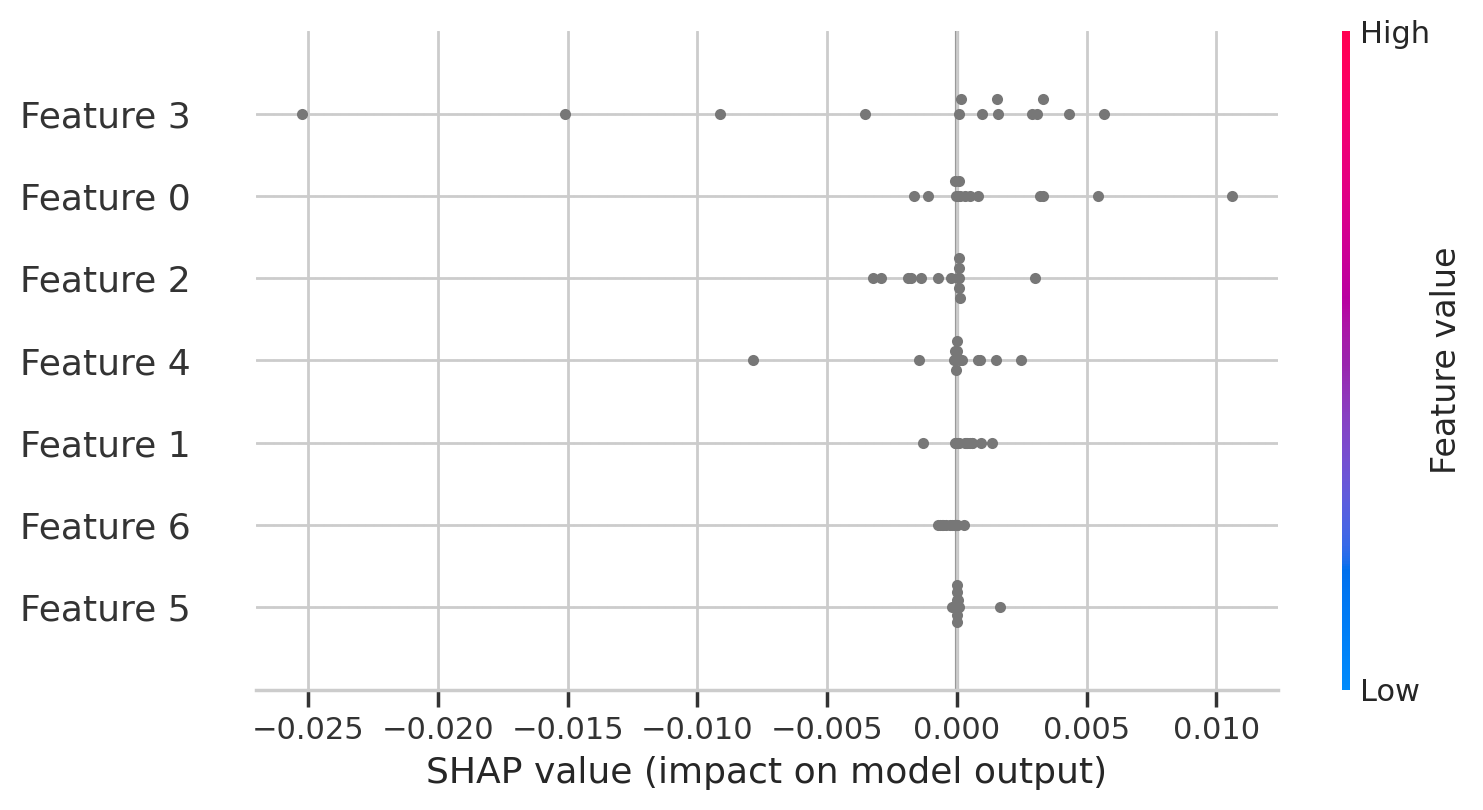

In [54]:
import matplotlib.pyplot as plt
print(shap_values[14].shape, X_test[14].shape)
shap.summary_plot(shap_values[14], X_test[14], show= False)
print(X_test[14])

(14, 7) torch.Size([14, 7])
tensor([[0.8554, 0.8243, 0.3683, 0.9511, 0.1853, 0.0075, 0.6752],
        [0.7357, 0.9099, 0.3762, 0.9675, 0.2020, 0.0148, 0.6752],
        [0.7296, 0.9198, 0.3873, 0.9633, 0.1887, 0.0086, 0.6752],
        [0.4196, 0.8811, 0.3914, 0.7105, 0.3160, 0.0998, 0.6752],
        [0.3332, 0.8713, 0.4290, 0.5882, 0.1042, 0.0062, 0.6752],
        [0.9421, 0.8144, 0.3988, 0.9312, 0.1823, 0.0059, 0.6752],
        [0.8996, 0.8752, 0.3902, 0.9241, 0.2273, 0.0121, 0.6752],
        [0.9357, 0.8602, 0.3936, 0.9466, 0.1880, 0.0107, 0.6752],
        [0.7889, 0.8190, 0.4488, 0.9736, 0.1935, 0.0455, 0.6752],
        [0.7736, 0.8291, 0.5185, 0.9759, 0.1606, 0.0149, 0.6752],
        [0.3868, 0.7894, 0.5048, 0.7186, 0.1747, 0.0528, 0.6752],
        [0.3268, 0.8654, 0.4235, 0.5878, 0.0651, 0.0070, 0.6752],
        [1.0000, 0.7862, 0.3370, 0.9118, 0.1427, 0.0082, 0.6752],
        [0.8461, 0.8940, 0.3513, 0.9214, 0.1510, 0.0158, 0.6752]],
       device='cuda:3')


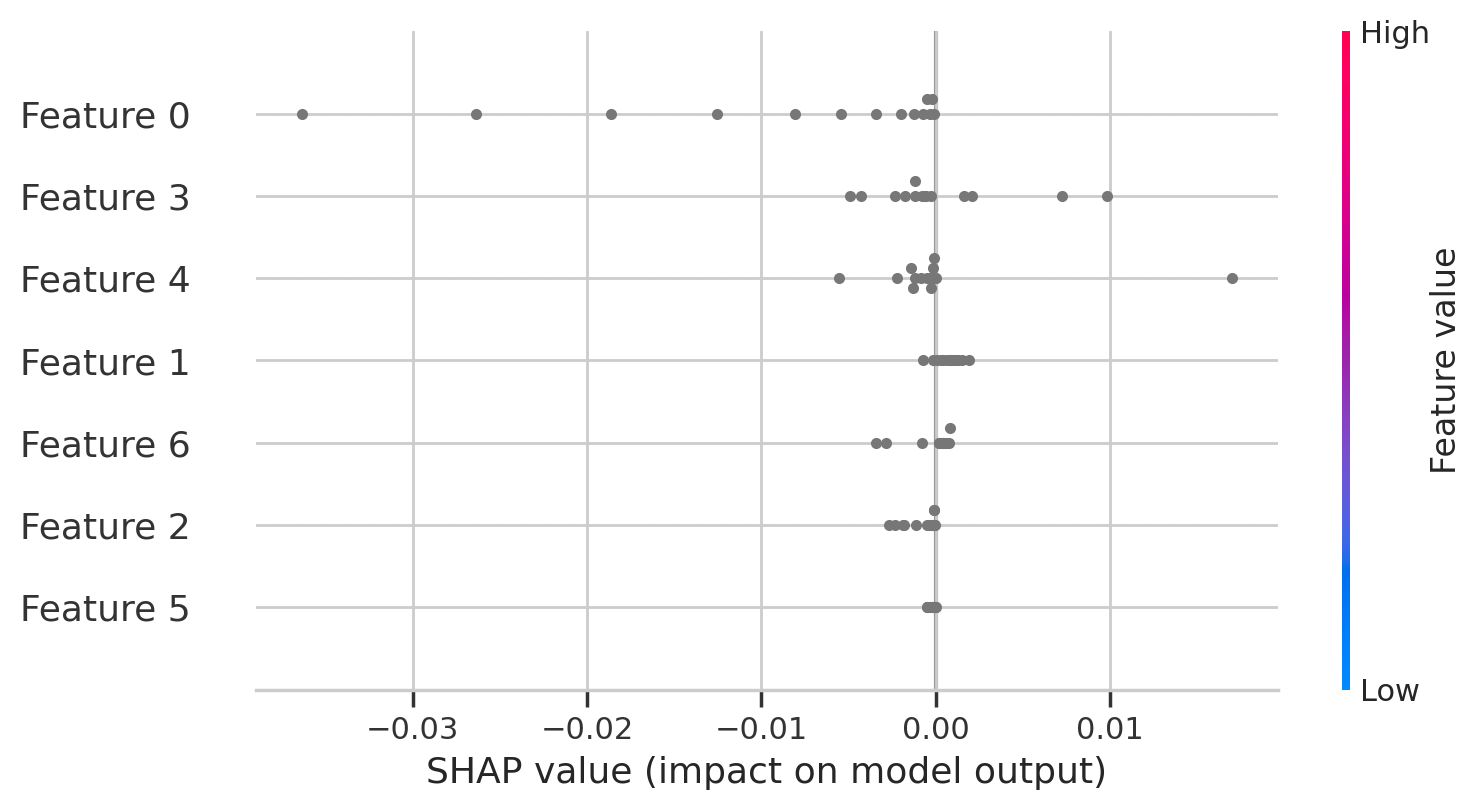

In [55]:
import matplotlib.pyplot as plt
print(shap_values[29].shape, X_test[29].shape)
shap.summary_plot(shap_values[29], X_test[29], show= False)
print(X_test[29])

(14, 7) torch.Size([14, 7])
tensor([[0.7293, 0.8830, 0.3786, 0.8597, 0.1984, 0.0108, 0.6413],
        [0.3239, 0.9339, 0.3817, 0.6829, 0.2407, 0.0187, 0.6413],
        [0.2504, 0.8314, 0.3789, 0.5364, 0.1431, 0.0055, 0.6413],
        [0.8929, 0.7898, 0.2627, 0.8744, 0.2059, 0.0094, 0.6413],
        [0.7946, 0.8717, 0.2026, 0.9072, 0.2437, 0.0127, 0.6413],
        [0.7200, 0.8021, 0.1703, 0.9027, 0.2555, 0.0126, 0.6413],
        [0.6546, 0.7896, 0.2194, 0.8221, 0.2229, 0.0119, 0.6413],
        [0.4186, 0.8736, 0.3379, 0.6309, 0.2124, 0.0122, 0.6413],
        [0.4482, 0.7923, 0.1303, 0.5167, 0.1216, 0.0012, 0.6413],
        [0.4321, 0.7325, 0.0957, 0.4929, 0.1498, 0.0072, 0.6413],
        [0.9246, 0.7623, 0.2096, 0.6573, 0.1990, 0.0399, 0.6413],
        [0.8943, 0.8520, 0.3022, 0.6836, 0.1670, 0.0079, 0.6413],
        [0.8868, 0.9693, 0.3892, 0.7007, 0.1710, 0.0152, 0.6413],
        [0.8957, 0.9412, 0.5302, 0.7228, 0.1862, 0.0192, 0.6413]],
       device='cuda:3')


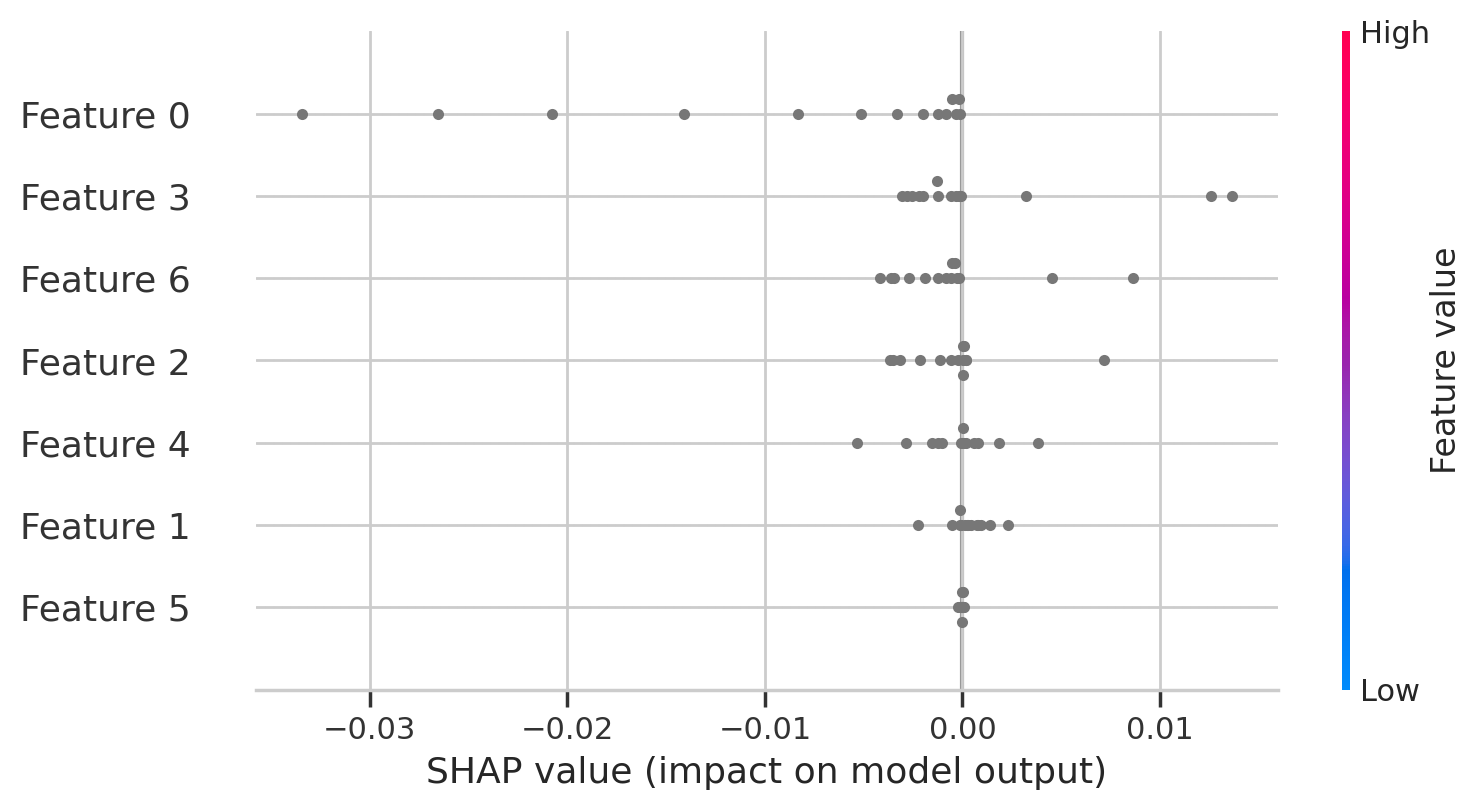

In [56]:
import matplotlib.pyplot as plt
print(shap_values[66].shape, X_test[66].shape)
shap.summary_plot(shap_values[66], X_test[66], show= False)
print(X_test[66])

In [57]:
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [95]:
shap.dependence_plot("Feature 0", shap_values, X_test[0])

TypeError: can't convert cuda:3 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

######################################### Plots End here ####################################

######################################## Data Distribution Visuaisation #############################

['infection_daily', 'humidity', 'temperature', 'traffic_volume', 'contactMean', 'contactIdx', 'policyIdx']


<Figure size 1000x600 with 0 Axes>

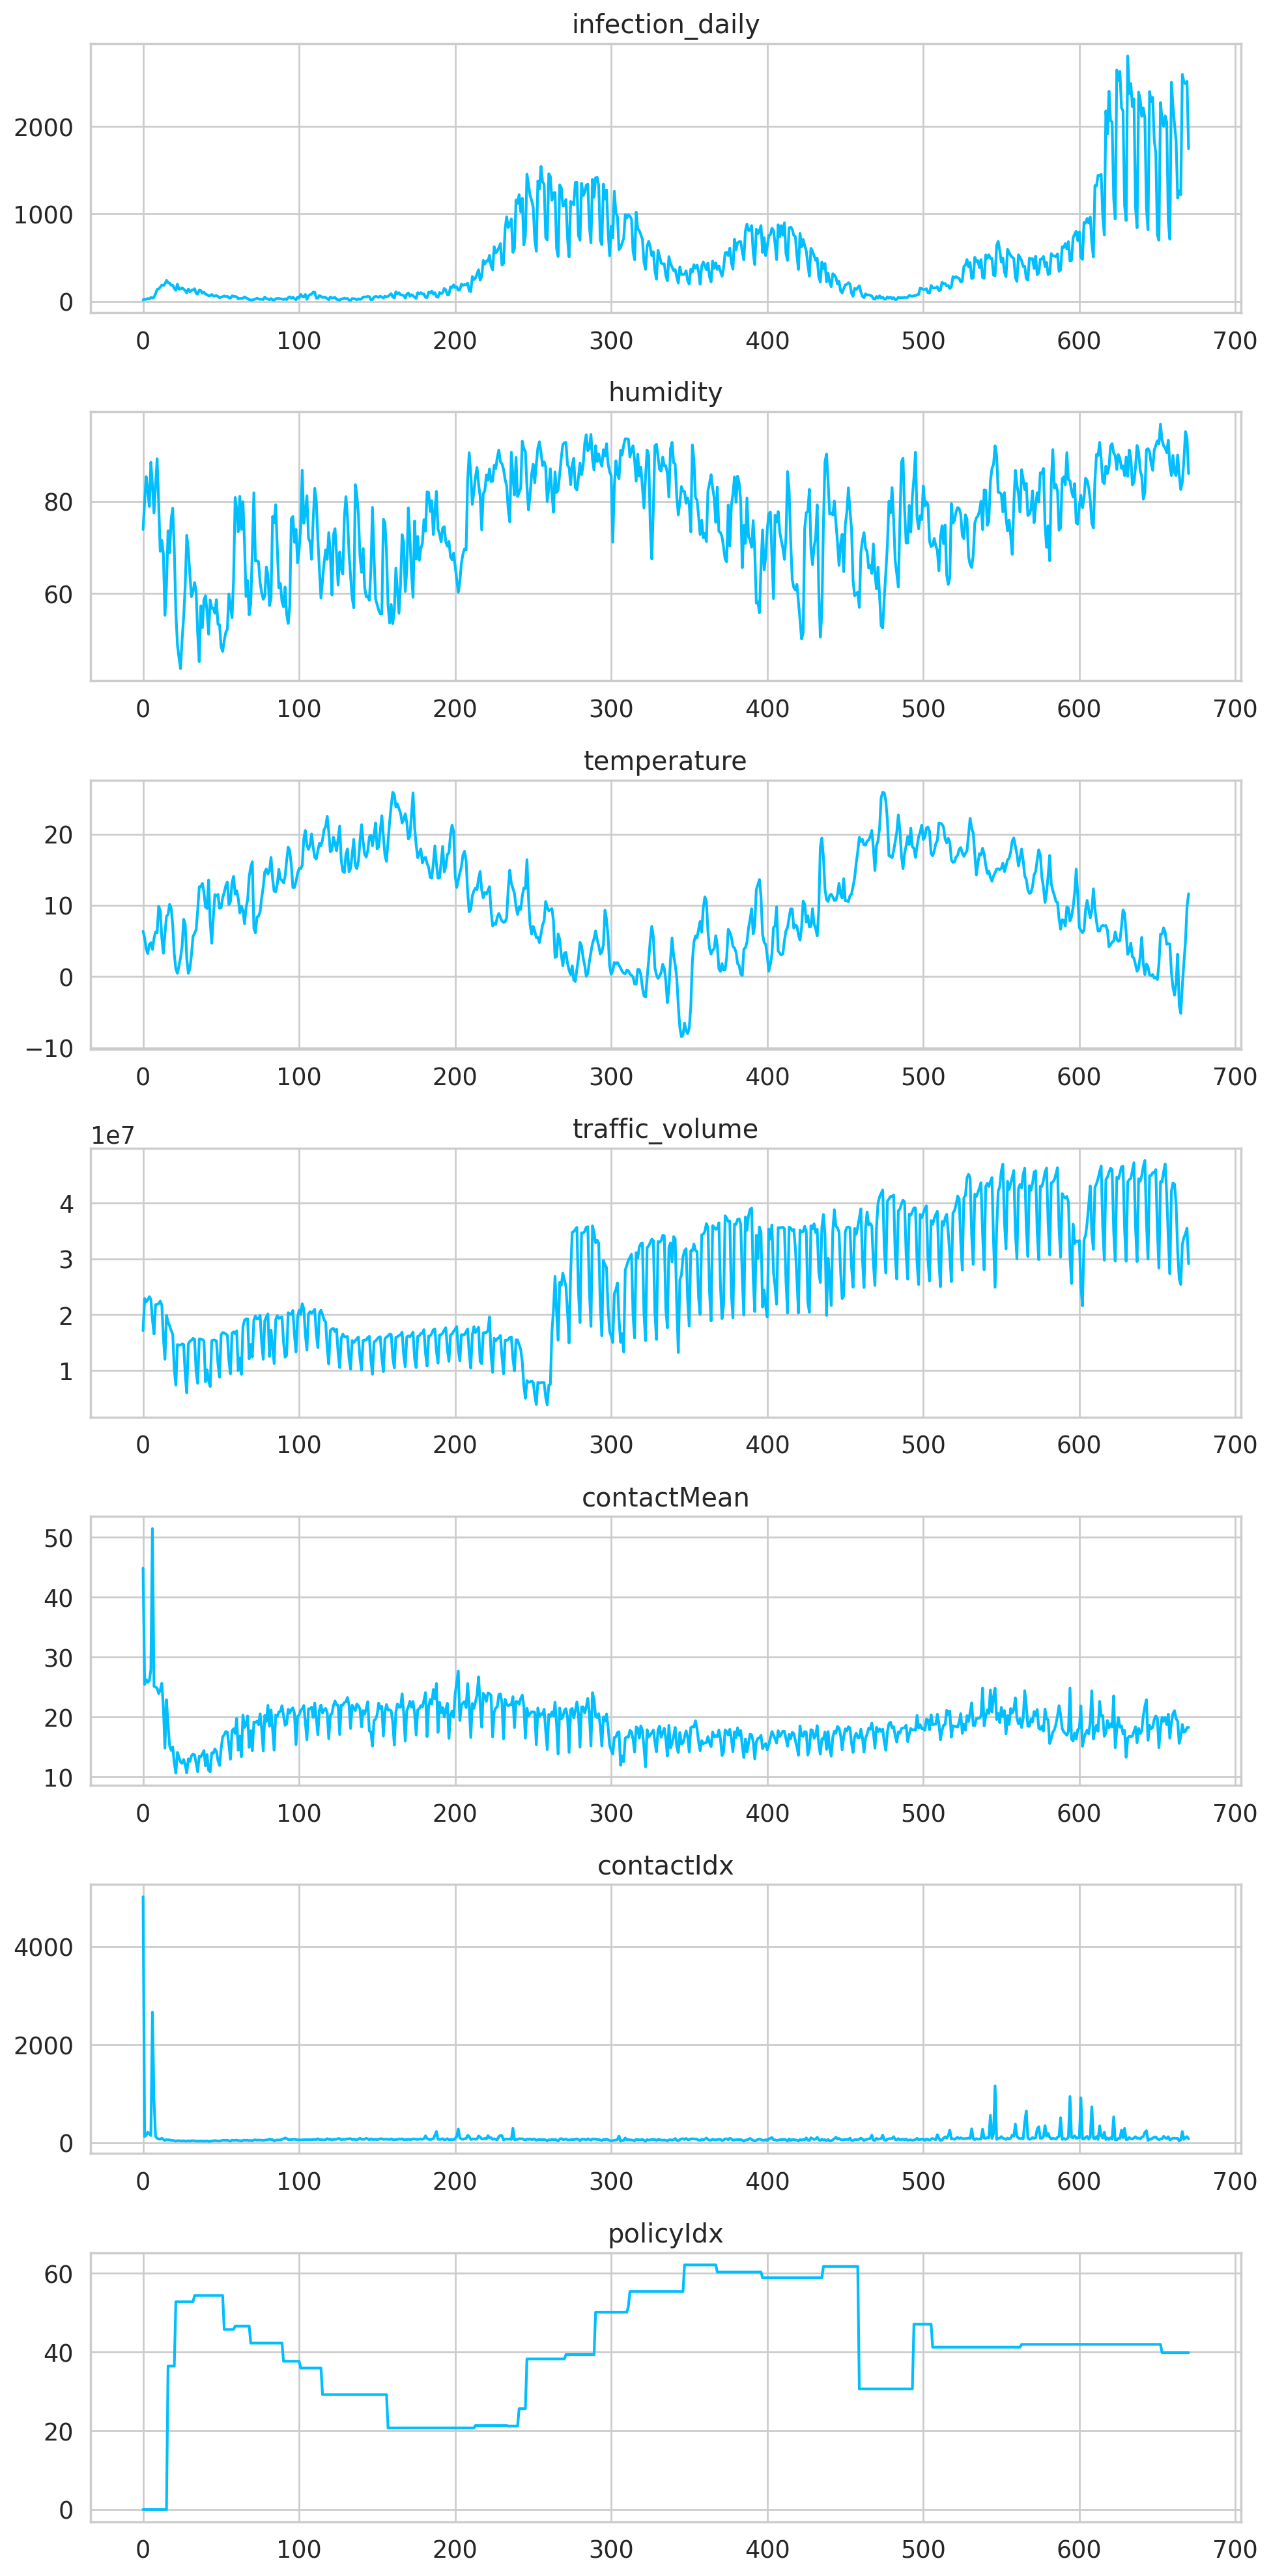

In [9]:
# X_train
# X_val
# X_test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 可视化
plt.figure(figsize=(10, 6))
#sns.boxplot(data= df_new)
print(list(df_new.columns))

# Number of rows and columns for the subplots
n_rows = 7
n_cols = 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 20))

# Loop through the columns and create a plot for each one
for i, col in enumerate(df_new.columns):
    axes[i].plot(df[col])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设 df 是您的 DataFrame
# 如果需要创建示例 DataFrame，请取消注释以下行
# data = np.random.randn(20, 7)  # 20x7 的随机数数组
# df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7'])

# 循环遍历每个列
for i, col in enumerate(df_new.columns):
    plt.figure(figsize=(8, 4))
    plt.plot(df[col])
    plt.title(col)
    plt.xlabel('Index')
    plt.ylabel('Value')

    # 保存图形为 PNG 文件
    plt.savefig(f"{col}.png")
    plt.close()  # 关闭图形，以便释放内存


In [88]:
shap.plots.heatmap(shap_values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Use Explainer to turn data from 3D to 2D

In [45]:
#######################################      Explainer    #############################################
import torch
print('train, valida, test of X:', X_train.shape, X_val.shape, X_test.shape)
print('train, valida, test of Y:', Y_train.shape, Y_val.shape, Y_test.shape)
# 假设data是原始三维时间序列数据: [日期数, 时间步数, 特征数]
# data = ...

# 展平时间步和特征维度
# 新的维度将是 [日期数, 时间步数 * 特征数]
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
# 用展平后的数据创建Tensor
X_train_flattened_tensor = torch.tensor(X_train_flattened, dtype=torch.float32)
print(X_train_flattened_tensor.shape)

X_val_flattened = X_val.reshape(X_val.shape[0], -1)
# 用展平后的数据创建Tensor
X_val_flattened_tensor = torch.tensor(X_val_flattened, dtype=torch.float32)
print(X_val_flattened_tensor.shape)

# 为LSTM创建输入
# 这里，序列长度将是展平后的时间步与特征的乘积
lstm = torch.nn.LSTM(input_size= X_train_flattened.shape[1], hidden_size= 50, batch_first=True)
# 进行训练（示例）
# 假设您已经设置了训练循环和必要的参数
outputs, (hn, cn) = lstm(X_train_flattened_tensor.unsqueeze(0))

train, valida, test of X: torch.Size([459, 14, 7]) torch.Size([131, 14, 7]) torch.Size([67, 14, 7])
train, valida, test of Y: torch.Size([459]) torch.Size([131]) torch.Size([67])
torch.Size([459, 98])
torch.Size([131, 98])


To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [50]:
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value (column "A")

    def forward(self, x):
        out, _ = self.lstm(x)
        #out = self.batch_norm(out[:, -1, :])
        out = self.batch_norm(out)
        out = self.dropout(out)
        #out = self.dropout(out[:, -1, :])  # Take the last time step
        out = self.fc(out)
        return out

model = TimeSeriesLSTM(input_dim=98, hidden_dim=50, num_layers=2, dropout_prob=0.0)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch [10/200], Training Loss: 0.0270, Validation Loss: 0.0215
Epoch [20/200], Training Loss: 0.0104, Validation Loss: 0.0179
Epoch [30/200], Training Loss: 0.0052, Validation Loss: 0.0138
Epoch [40/200], Training Loss: 0.0034, Validation Loss: 0.0126
Epoch [50/200], Training Loss: 0.0029, Validation Loss: 0.0112
Epoch [60/200], Training Loss: 0.0025, Validation Loss: 0.0089
Epoch [70/200], Training Loss: 0.0022, Validation Loss: 0.0074
Epoch [80/200], Training Loss: 0.0020, Validation Loss: 0.0071
Epoch [90/200], Training Loss: 0.0019, Validation Loss: 0.0057
Epoch [100/200], Training Loss: 0.0017, Validation Loss: 0.0036
Epoch [110/200], Training Loss: 0.0016, Validation Loss: 0.0029
Epoch [120/200], Training Loss: 0.0015, Validation Loss: 0.0026
Epoch [130/200], Training Loss: 0.0014, Validation Loss: 0.0025
Epoch [140/200], Training Loss: 0.0013, Validation Loss: 0.0024
Epoch [150/200], Training Loss: 0.0012, Validation Loss: 0.0023
Epoch [160/200], Training Loss: 0.0011, Validatio

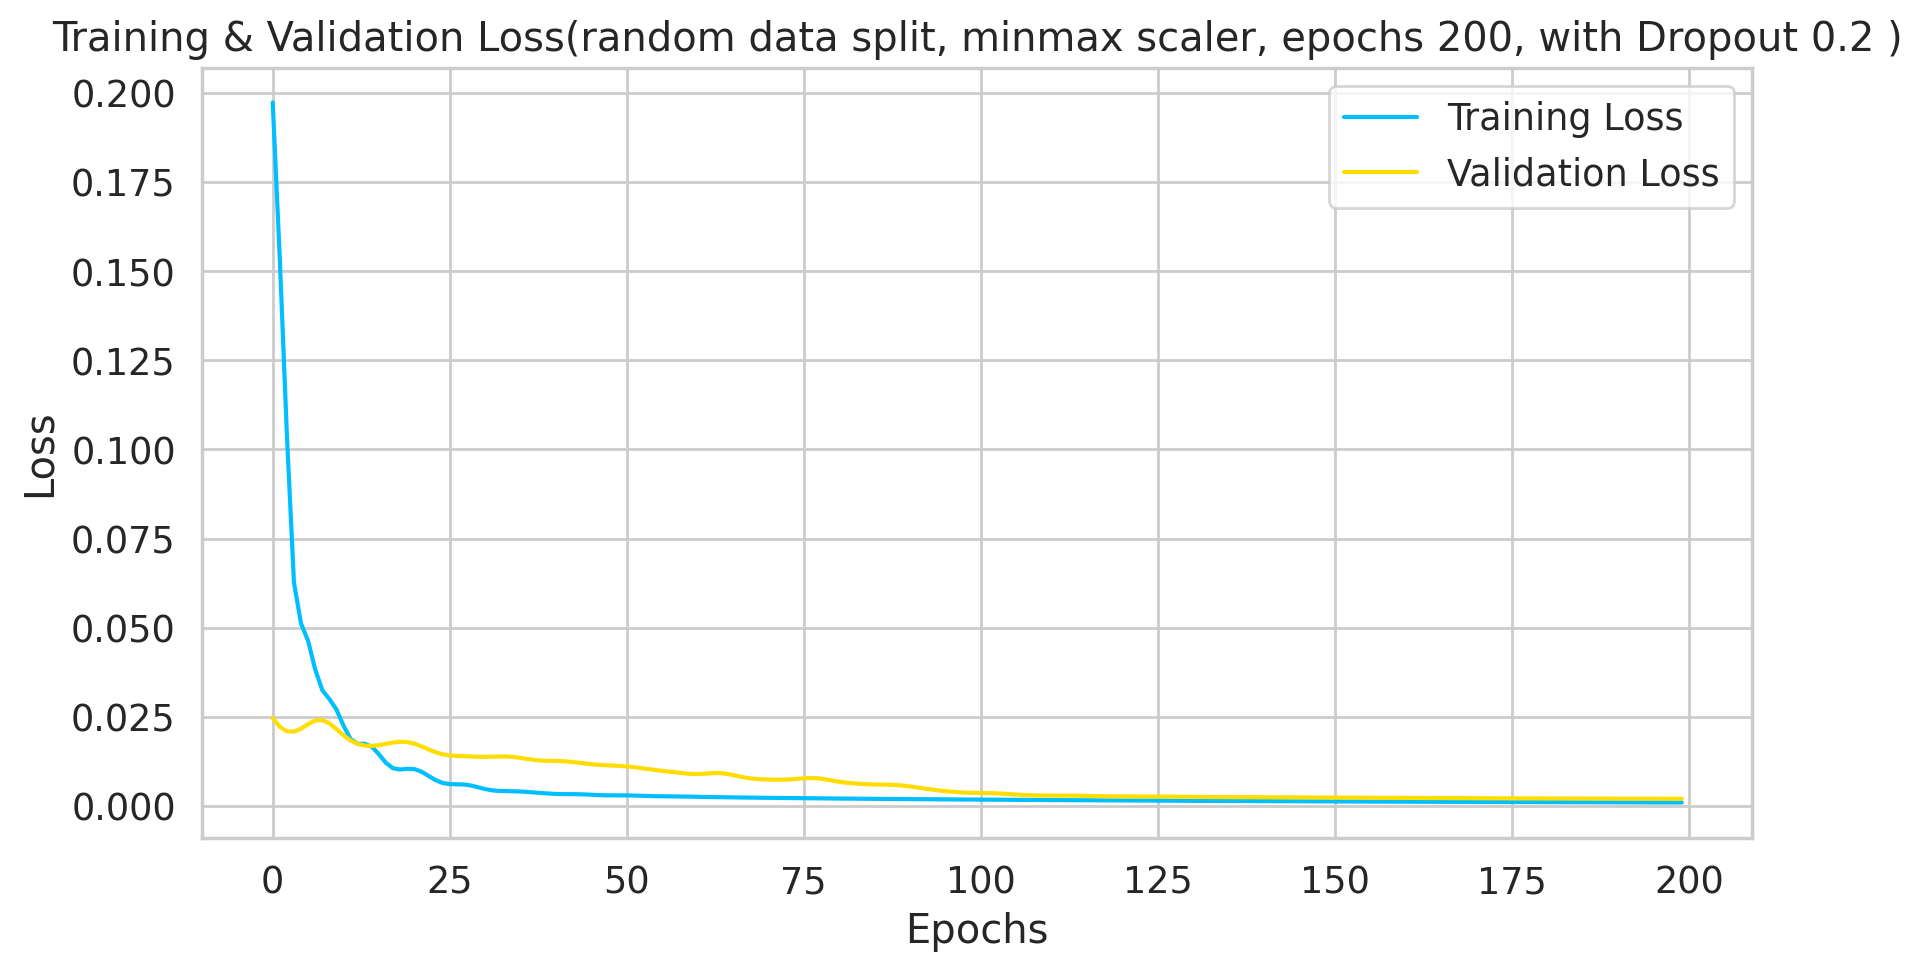

In [51]:
############################ random data split, minmax scaler, epochs 200, with Dropout 0.2 #######################
epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train_flattened_tensor )
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_flattened_tensor )
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 200, with Dropout 0.2 )')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

explainer = shap.Explainer(model, X_train)
print(X_train.shape)
print(X_train[:459].shape)

shap_values = explainer(X_train)

In [20]:
#explainer = shap.GradientExplainer(model, background)
#shap_values, _ = explainer.shap_values(X_test, nsamples=100)

# Plotting for a specific instance
# shap.initjs()
# shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=['feature1', 'feature2', ...])

AttributeError: 'Permutation' object has no attribute 'expected_value'

In [15]:
################## save the model#####################
torch.save(model, '/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/uncertainty_LSTM.pth')

loaded_model= torch.load('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/uncertainty_LSTM.pth')

In [16]:

######################### SHAP ##########################
import shap

# Assuming `model` is your trained LSTM model
explainer = shap.DeepExplainer(model, X_train[:100]) # Use a subset of the training data as background
shap_values = explainer.shap_values(X_test)

/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

In [20]:
# Plotting the SHAP values for the first instance in the test set
shap.initjs()
#shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())
shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())


AttributeError: 'numpy.float32' object has no attribute 'detach'

In [ ]:
# Summing SHAP values over all time steps
shap_aggregated = shap_values[0].sum(axis=1)

# Plot summary
shap.summary_plot(shap_aggregated, X_test.detach().numpy().sum(axis=1))


Epoch [10/70], Training Loss: 0.0207, Validation Loss: 0.0103
Epoch [20/70], Training Loss: 0.0191, Validation Loss: 0.0057
Epoch [30/70], Training Loss: 0.0176, Validation Loss: 0.0047
Epoch [40/70], Training Loss: 0.0145, Validation Loss: 0.0050
Epoch [50/70], Training Loss: 0.0088, Validation Loss: 0.0024
Epoch [60/70], Training Loss: 0.0076, Validation Loss: 0.0053
Epoch [70/70], Training Loss: 0.0058, Validation Loss: 0.0023


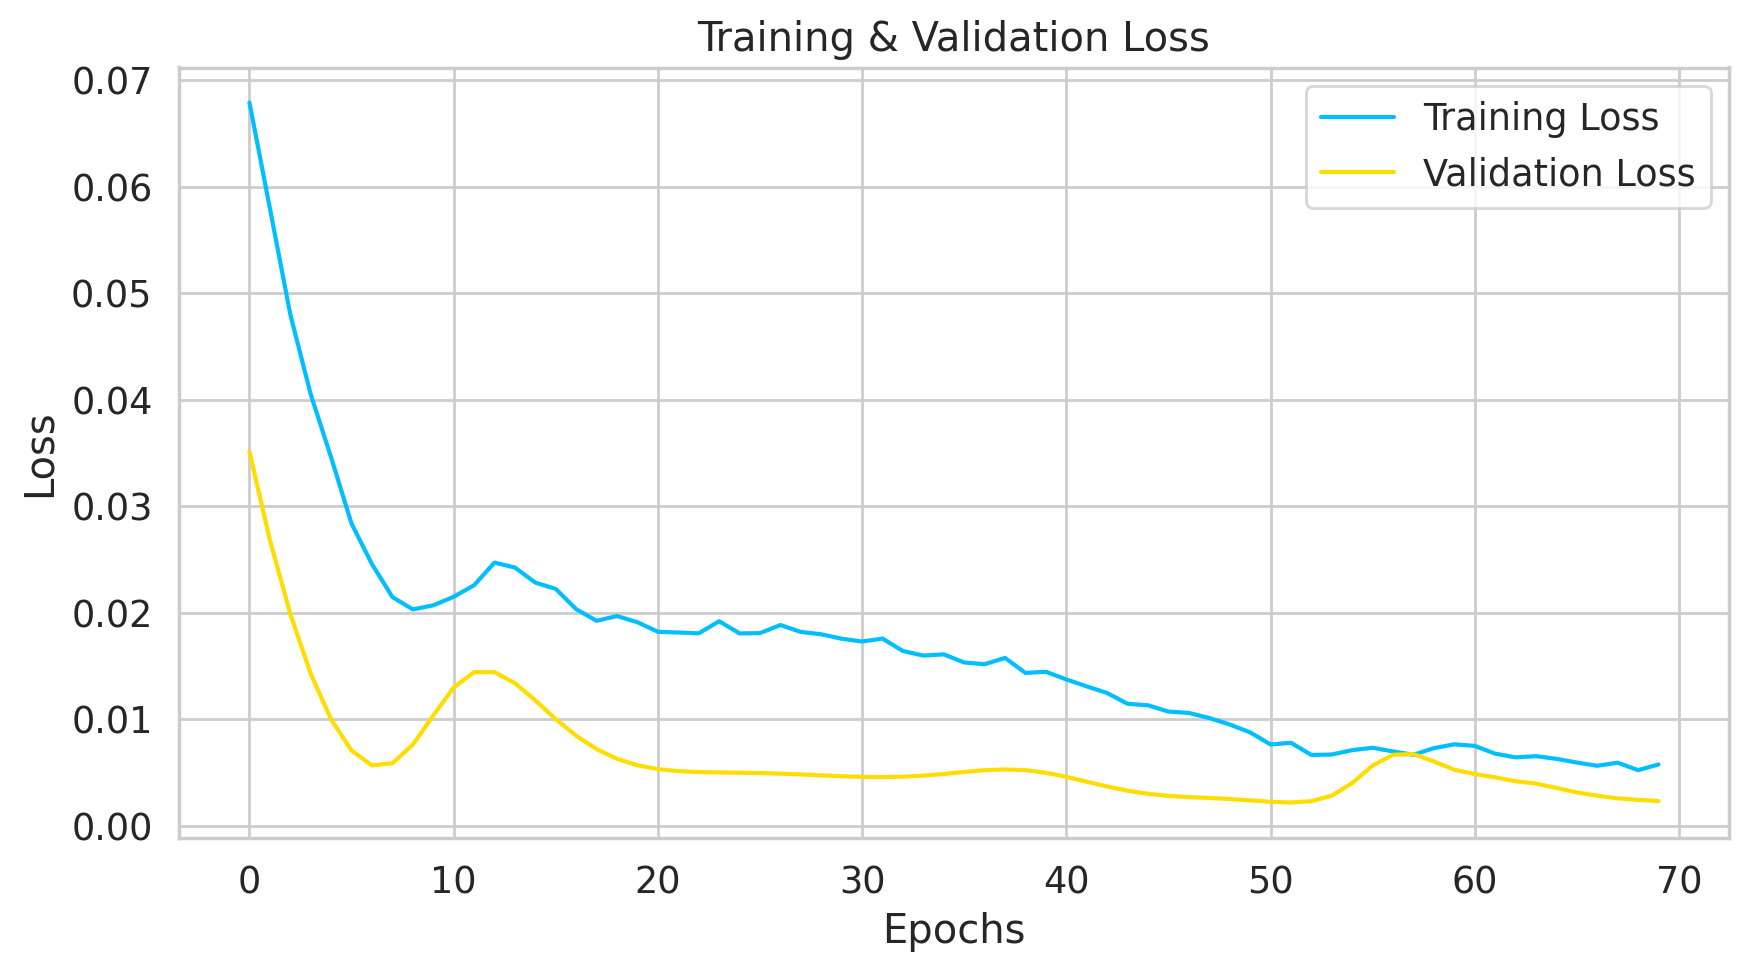

In [26]:
############################ minmax scaler, epochs 70#######################
epochs = 70
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/70], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/70], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/70], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/70], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/70], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/70], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/70], Training Loss: 0.0682, Validation Loss: 0.0860


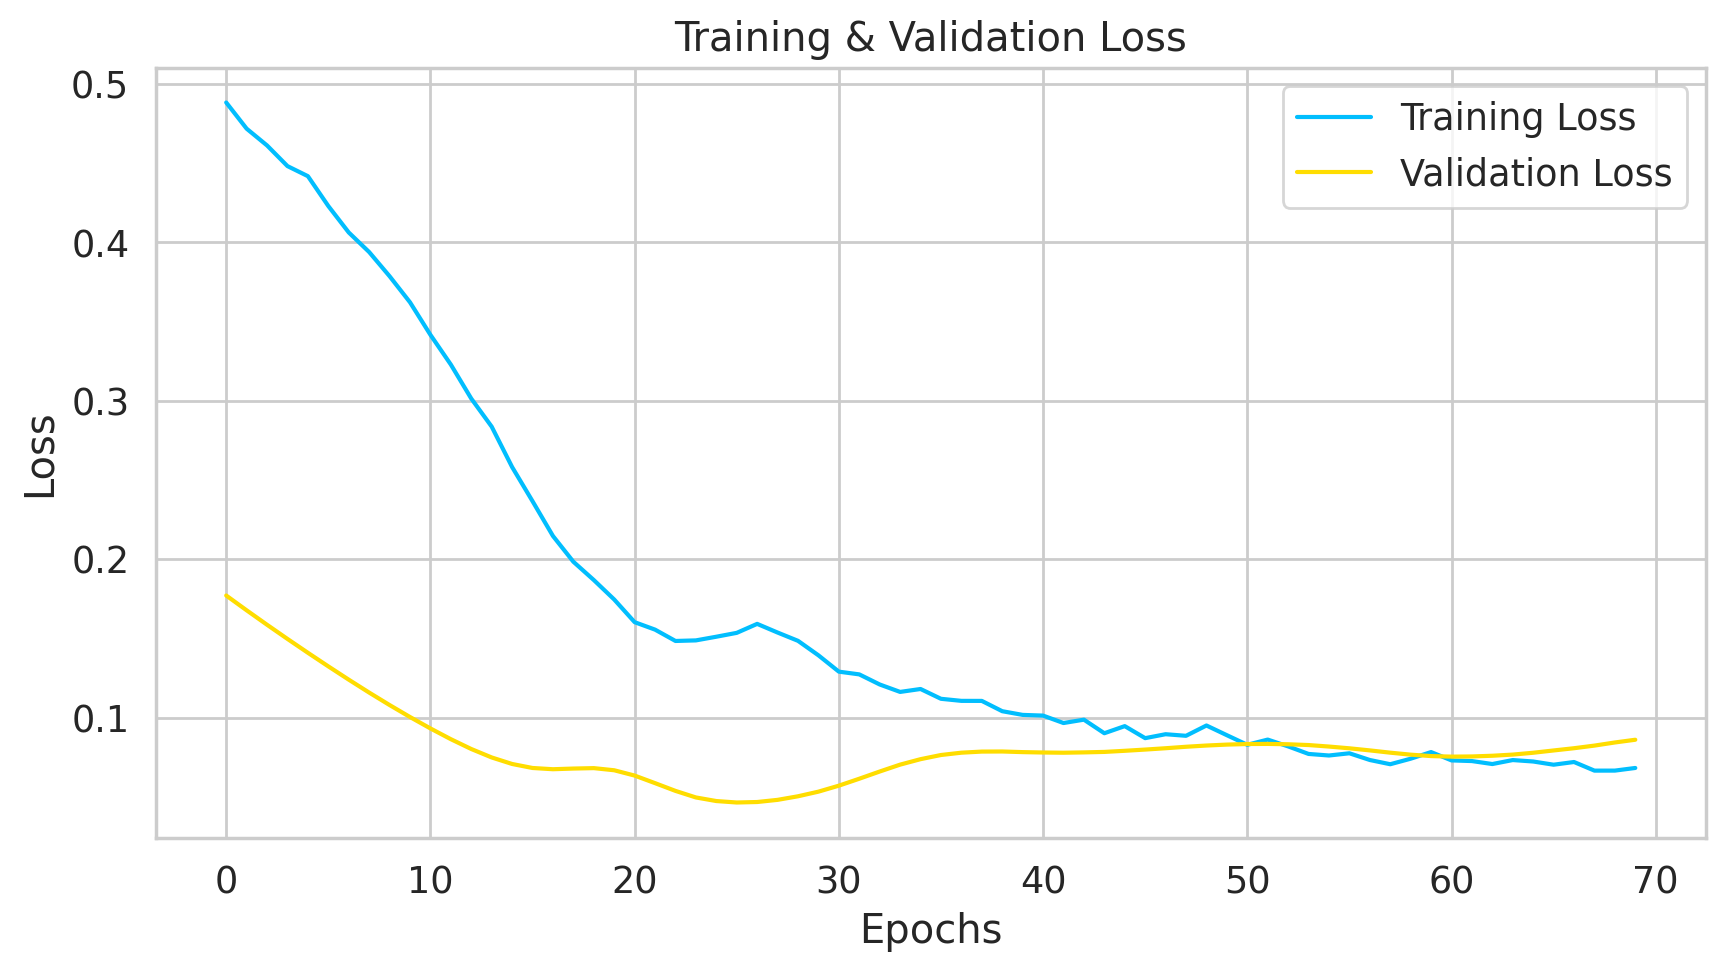

In [17]:
############################ standard scaler, epochs 70#######################
epochs = 70
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/100], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/100], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/100], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/100], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/100], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/100], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/100], Training Loss: 0.0682, Validation Loss: 0.0860
Epoch [80/100], Training Loss: 0.0665, Validation Loss: 0.1072
Epoch [90/100], Training Loss: 0.0674, Validation Loss: 0.1148
Epoch [100/100], Training Loss: 0.0643, Validation Loss: 0.1164


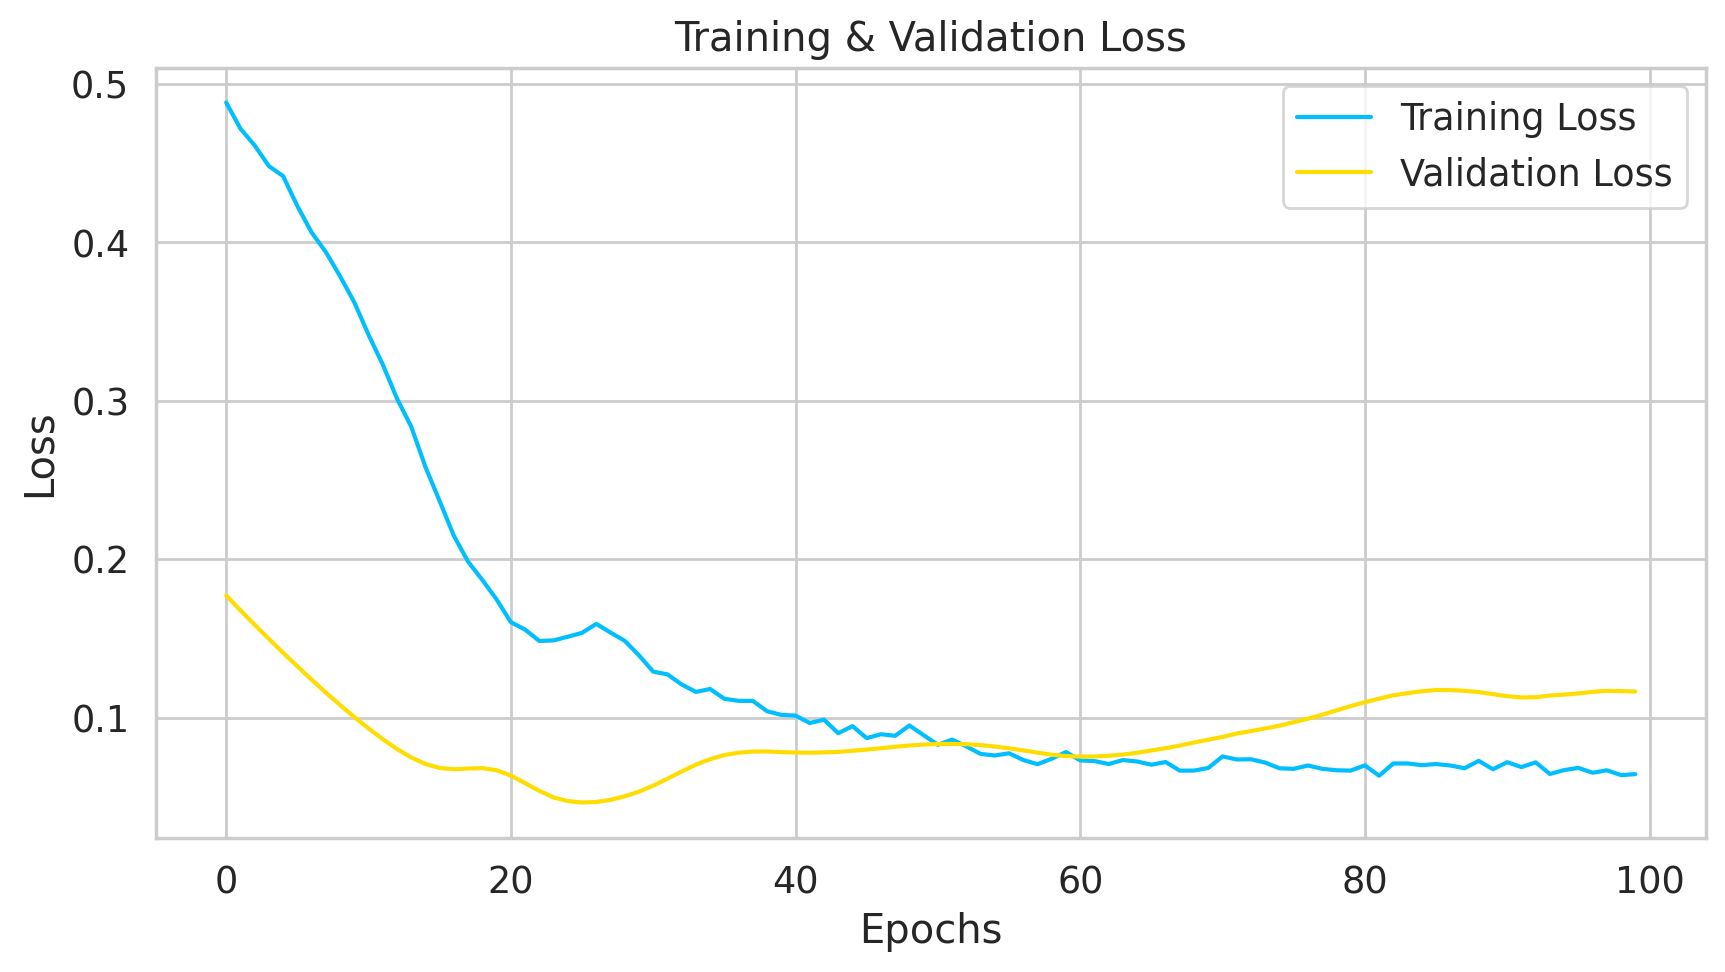

In [8]:
############################ minmax scaler, epochs 70#######################
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/1000], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/1000], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/1000], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/1000], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/1000], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/1000], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/1000], Training Loss: 0.0682, Validation Loss: 0.0860
Epoch [80/1000], Training Loss: 0.0665, Validation Loss: 0.1072
Epoch [90/1000], Training Loss: 0.0674, Validation Loss: 0.1148
Epoch [100/1000], Training Loss: 0.0643, Validation Loss: 0.1164
Epoch [110/1000], Training Loss: 0.0706, Validation Loss: 0.1183
Epoch [120/1000], Training Loss: 0.0647, Validation Loss: 0.1348
Epoch [130/1000], Training Loss: 0.0670, Validation Loss: 0.1396
Epoch [140/1000], Training Loss: 0.0635, Validation Loss: 0.1439
Epoch [150/1000], Training Loss: 0.0579, Validation Loss: 0.1576
Epoch [160/1000], Training Loss: 0

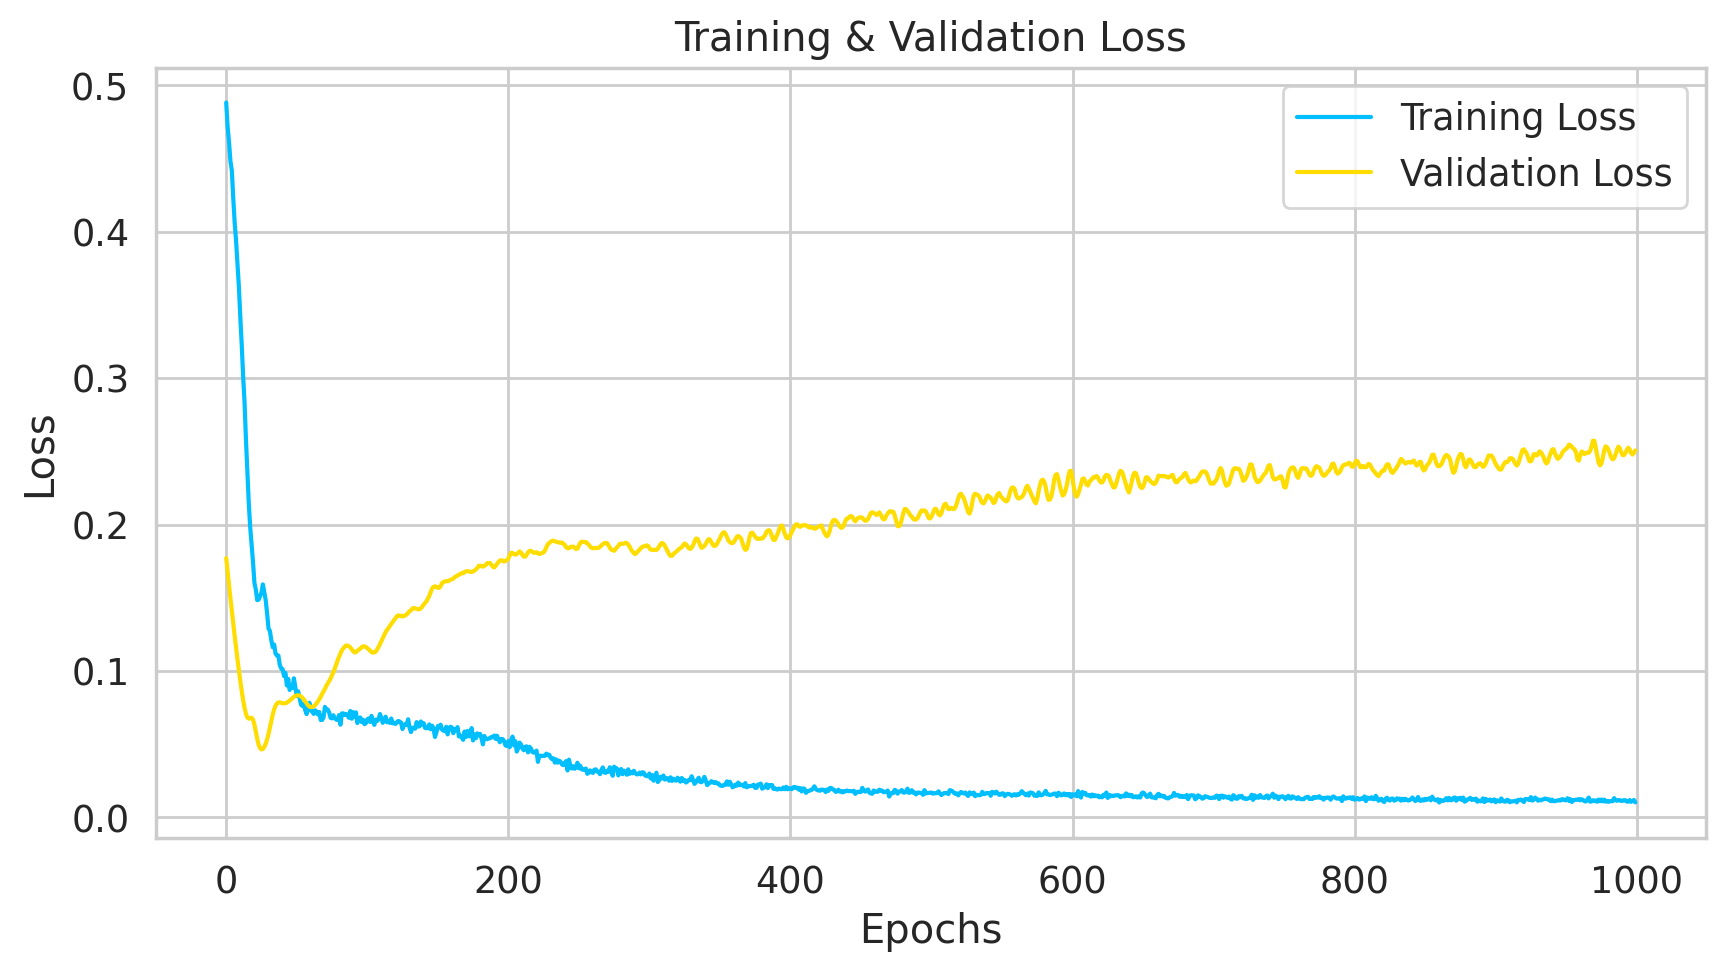

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


BARD

In [24]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get the last 14 days of data
        X = self.data[idx - 14:idx]

        # Standardize the data
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Get the target variable
        y = self.data[idx]

        return X, y

In [11]:
# scaler = StandardScaler()
# #scaler = scaler.fit(np.expand_dims(df_new[:657], axis=1))
# scaler = scaler.fit(df_new[:657])
 
# train_data = scaler.transform(df_new[:657])
# test_data = scaler.transform(df_new[657:])

In [25]:
train_dataset = Dataset(df_new[:657])
test_dataset = Dataset(df_new[657:])
print(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

In [26]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMModel, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.linear(x)

        return x


In [27]:
model = LSTMModel(input_size=7, hidden_size=128, num_layers= 3, dropout=0.3)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch + 1}, Batch: {batch_idx}, Loss: {loss.item():.4f}')


KeyError: 418

In [ ]:
with torch.no_grad():
    total_loss = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)

        # Update total loss
        total_loss += loss.item()

    # Compute average loss
    avg_loss = total_loss / len(test_loader)

    print(f'Test loss: {avg_loss:.4f}')
